Importing Libraries

In [2]:
# import numpy and pandas
import pandas as pd
import numpy as np

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# do an inline so that plt.show() is not required everytime
%matplotlib inline

# import for pre-processing
# scale (this is same as standard scalar)
from sklearn.preprocessing import scale
# label encoding
from sklearn.preprocessing import LabelEncoder

# import for model selection:
# splitting data into training, test data and validation data
from sklearn.model_selection import train_test_split
# Import for scaling dataframe
from sklearn.preprocessing import StandardScaler
# import for creating K-folds
from sklearn.model_selection import KFold
# import for CV using folds created
from sklearn.model_selection import cross_val_score
# import for grid search cv for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# import for report of model performance (useful for classification models)
from sklearn import metrics
# import for Stratified K fold
from sklearn.model_selection  import StratifiedKFold
# import for Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
#import for SVM
from sklearn import svm
# import for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Making miscellaneous setting for better experience
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)

Importing Dataset

In [117]:
# Importing the 'telecom_churn_data.csv' dataset
df_data = pd.read_csv('/content/train.csv')

Understanding Dataset

In [118]:
# Understanding the dataset
df_data.shape

(69999, 172)

In [119]:
# Understanding the dataset
df_data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [120]:
df_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [121]:
#CHECK NULL VALUES
df_data.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [123]:
#let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
df_data['total_rech_amt_data_6'] = df_data.av_rech_amt_data_6 + df_data.total_rech_data_6
df_data['total_rech_amt_data_7'] = df_data.av_rech_amt_data_7 + df_data.total_rech_data_7
df_data['total_rech_amt_data_8'] = df_data.av_rech_amt_data_8 + df_data.total_rech_data_8

#Defining total average recharge amount for good phase for months 6 and 7 (the good phase)
df_data['total_avg_rech_amnt_6_7_GPhase'] = (df_data.total_rech_amt_6 + df_data.total_rech_amt_data_6+ df_data.av_rech_amt_data_7 + df_data.total_rech_data_7)

In [124]:
# calculate percentage of null values column-wise
null_counts = df_data.isnull().sum()
total_rows = df_data.shape[0]
null_percentages = (null_counts / total_rows) * 100

# create a list of column names to drop
columns_to_drop = null_percentages[null_percentages > 40].index.tolist()

# drop the columns
df_data = df_data.drop(columns_to_drop, axis=1)

In [125]:
df_data.shape

(69999, 142)

In [126]:
# Calculating the total usage (voice & Data)
df_data['churn']=df_data['total_og_mou_8']+df_data['total_ic_mou_8']+df_data['vol_2g_mb_8']+df_data['vol_3g_mb_8']
df_data['churn']=df_data['churn'].map(lambda x: 1 if x==0 else 0)

In [127]:
# Churn Rate within our dataframe of High-Value customers
print(f'Churn rate within High-Value Customers: {round(len(df_data[df_data["churn"]>0].index)/len(df_data.index)*100,2)}')

Churn rate within High-Value Customers: 7.84


Deleting the date columns as the date columns are not required in our analysis

In [128]:
# List the date columns
date_cols = [k for k in df_data.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [129]:
# Dropping date columns
df_data = df_data.drop(date_cols, axis=1)

In [130]:
##Dropping the circle_id column.It only has one distinct value. So, this column will have no effect on the data analysis.
df_data = df_data.drop('circle_id', axis=1)

In [131]:
#column avg_rech_amt_6_7 is created by adding the total recharge amounts for months 6 and 7. take the sum's average after that.
df_data['avg_rech_amt_6_7'] = (df_data['total_rech_amt_6'] + df_data['total_rech_amt_7'])/2

In [132]:
#70th percentile of the avg_rech_amt_6_7
temp = df_data['avg_rech_amt_6_7'].quantile(0.7)

##find the clients who have equal to or more than 0 percentile
df_data = df_data[df_data['avg_rech_amt_6_7'] >= temp]
df_data.shape

(21018, 137)

In [133]:
##Dealing with missig value in rows
df_missing_rows_more_50 = df_data[(df_data.isnull().sum(axis=1)) > (len(df_data.columns)//2)]

# Removing the rows with more than 50% missing values
df_data = df_data.drop(df_missing_rows_more_50.index)
df_data.shape

(20938, 137)

In [134]:
##Checking the missing values in columns again
df_missing_columns = (round(((df_data.isnull().sum()/len(df_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
loc_og_mou_8        2.75
loc_og_t2t_mou_8    2.75
loc_og_t2f_mou_8    2.75
std_ic_t2o_mou_8    2.75
loc_og_t2c_mou_8    2.75
std_og_t2t_mou_8    2.75
std_ic_t2f_mou_8    2.75
std_og_t2m_mou_8    2.75
std_og_t2f_mou_8    2.75
std_og_t2c_mou_8    2.75
std_ic_t2m_mou_8    2.75
std_og_mou_8        2.75
isd_og_mou_8        2.75
spl_og_mou_8        2.75
std_ic_t2t_mou_8    2.75
og_others_8         2.75
loc_ic_mou_8        2.75
loc_ic_t2t_mou_8    2.75
loc_ic_t2f_mou_8    2.75
loc_og_t2m_mou_8    2.75
loc_ic_t2m_mou_8    2.75
std_ic_mou_8        2.75
roam_og_mou_8       2.75
spl_ic_mou_8        2.75
onnet_mou_8         2.75
roam_ic_mou_8       2.75
isd_ic_mou_8        2.75
offnet_mou_8        2.75
ic_others_8         2.75
ic_others_6         0.68
std_ic_t2t_mou_6    0.68
loc_ic_t2t_mou_6    0.68
onnet_mou_6         0.68
std_og_t2c_mou_6    0.68
spl_og_mou_6        0.68
isd_ic_mou_6        0.68
isd_og_mou_6        0.68
loc_ic_mou_6        0.68
loc_ic_t2m_mou_6    0.68
offnet_mou_6        0.68
std_og_mou_6        0.68
loc_og_t2m_mou_6    0.68
std_ic_t2m_mou_6    0.68
std_ic_t2f_mou_6    0.68
og_others_6         0.68
std_ic_mou_6        0.68
roam_ic_mou_6       0.68
std_og_t2m_mou_6    0.68
std_ic_t2o_mou_6    0.68
loc_og_t2t_mou_6    0.68
std_og_t2t_mou_6    0.68
loc_ic_t2f_mou_6    0.68
loc_og_mou_6        0.68
std_og_t2f_mou_6    0.68
loc_og_t2f_mou_6    0.68
roam_og_mou_6       0.68
spl_ic_mou_6        0.68
loc_og_t2c_mou_6    0.68
std_ic_mou_7        0.61
ic_others_7         0.61
std_ic_t2f_mou_7    0.61
loc_ic_mou_7        0.61
std_ic_t2t_mou_7    0.61
std_ic_t2o_mou_7    0.61
std_ic_t2m_mou_7    0.61
spl_ic_mou_7        0.61
isd_ic_mou_7        0.61
loc_ic_t2f_mou_7    0.61
loc_og_mou_7        0.61
roam_og_mou_7       0.61
roam_ic_mou_7       0.61
loc_og_t2t_mou_7    0.61
loc_og_t2m_mou_7    0.61
loc_og_t2f_mou_7    0.61
loc_og_t2c_mou_7    0.61
offnet_mou_7        0.61
std_og_t2t_mou_7    0.61
std_og_t2m_mou_7    0.61
std_og_t2f_mou_7    0.61
std_og_t2c_mou_7    0.61
std_og_mou_7        0.61
isd_og_mou_7        0.61
spl_og_mou_7        0.61
onnet_mou_7         0.61
og_others_7         0.61
loc_ic_t2t_mou_7    0.61
loc_ic_t2m_mou_7    0.61
monthly_2g_8        0.00
sachet_2g_6         0.00
sachet_2g_7         0.00
sachet_3g_6         0.00
monthly_2g_7        0.00
monthly_2g_6        0.00
churn               0.00
vol_3g_mb_8         0.00
vol_3g_mb_7         0.00
vol_3g_mb_6         0.00
vol_2g_mb_8         0.00
sachet_2g_8         0.00
monthly_3g_7        0.00
churn_probability   0.00
jun_vbc_3g          0.00
jul_vbc_3g          0.00
aug_vbc_3g          0.00
monthly_3g_6        0.00
monthly_3g_8        0.00
vol_2g_mb_6         0.00
aon                 0.00
sachet_3g_8         0.00
sachet_3g_7         0.00
vol_2g_mb_7         0.00
id                  0.00
last_day_rch_amt_8  0.00
total_ic_mou_7      0.00
std_og_t2o_mou      0.00
loc_ic_t2o_mou      0.00
arpu_6              0.00
arpu_7              0.00
arpu_8              0.00
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
loc_og_t2o_mou      0.00
total_ic_mou_6      0.00
total_ic_mou_8      0.00
last_day_rch_amt_7  0.00
total_rech_num_6    0.00
total_rech_num_7    0.00
total_rech_num_8    0.00
total_rech_amt_6    0.00
total_rech_amt_7    0.00
total_rech_amt_8    0.00
max_rech_amt_6      0.00
max_rech_amt_7      0.00
max_rech_amt_8      0.00
last_day_rch_amt_6  0.00
avg_rech_amt_6_7    0.00

In [135]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 2.75]).index).to_list())

['loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'loc_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'roam_og_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'offnet_mou_8', 'ic_others_8']


In [136]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.68]).index).to_list())

['ic_others_6', 'std_ic_t2t_mou_6', 'loc_ic_t2t_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'spl_og_mou_6', 'isd_ic_mou_6', 'isd_og_mou_6', 'loc_ic_mou_6', 'loc_ic_t2m_mou_6', 'offnet_mou_6', 'std_og_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'og_others_6', 'std_ic_mou_6', 'roam_ic_mou_6', 'std_og_t2m_mou_6', 'std_ic_t2o_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_mou_6', 'std_og_t2f_mou_6', 'loc_og_t2f_mou_6', 'roam_og_mou_6', 'spl_ic_mou_6', 'loc_og_t2c_mou_6']


In [137]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.61]).index).to_list())

['std_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_mou_7', 'roam_og_mou_7', 'roam_ic_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'offnet_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'onnet_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7']


In [138]:
# Creating a df with the condition, in which MOU for (6,7,8) are null
df_data_null_mou_6 = df_data[(df_data['loc_og_t2m_mou_6'].isnull()) & (df_data['loc_ic_t2f_mou_6'].isnull()) & (df_data['roam_og_mou_6'].isnull()) & (df_data['std_ic_t2m_mou_6'].isnull()) &
  (df_data['loc_og_t2t_mou_6'].isnull()) & (df_data['std_ic_t2t_mou_6'].isnull()) & (df_data['loc_og_t2f_mou_6'].isnull()) & (df_data['loc_ic_mou_6'].isnull()) &
  (df_data['loc_og_t2c_mou_6'].isnull()) & (df_data['loc_og_mou_6'].isnull()) & (df_data['std_og_t2t_mou_6'].isnull()) & (df_data['roam_ic_mou_6'].isnull()) &
  (df_data['loc_ic_t2m_mou_6'].isnull()) & (df_data['std_og_t2m_mou_6'].isnull()) & (df_data['loc_ic_t2t_mou_6'].isnull()) & (df_data['std_og_t2f_mou_6'].isnull()) &
  (df_data['std_og_t2c_mou_6'].isnull()) & (df_data['og_others_6'].isnull()) & (df_data['std_og_mou_6'].isnull()) & (df_data['spl_og_mou_6'].isnull()) &
  (df_data['std_ic_t2f_mou_6'].isnull()) & (df_data['isd_og_mou_6'].isnull()) & (df_data['std_ic_mou_6'].isnull()) & (df_data['offnet_mou_6'].isnull()) &
  (df_data['isd_ic_mou_6'].isnull()) & (df_data['ic_others_6'].isnull()) & (df_data['std_ic_t2o_mou_6'].isnull()) & (df_data['onnet_mou_6'].isnull()) &
  (df_data['spl_ic_mou_6'].isnull())]



# Removing the records for which MOU for (6,7,8) are null
df_data = df_data.drop(df_data_null_mou_6.index)

In [139]:
##Checking the missing values in columns again
df_missing_columns = (round(((df_data.isnull().sum()/len(df_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
isd_ic_mou_8        2.68
roam_og_mou_8       2.68
loc_og_t2t_mou_8    2.68
loc_ic_t2f_mou_8    2.68
loc_og_t2m_mou_8    2.68
loc_ic_t2m_mou_8    2.68
loc_og_t2f_mou_8    2.68
loc_ic_t2t_mou_8    2.68
loc_og_t2c_mou_8    2.68
og_others_8         2.68
loc_og_mou_8        2.68
spl_og_mou_8        2.68
std_og_t2t_mou_8    2.68
isd_og_mou_8        2.68
std_og_t2m_mou_8    2.68
std_og_mou_8        2.68
std_og_t2f_mou_8    2.68
loc_ic_mou_8        2.68
std_og_t2c_mou_8    2.68
onnet_mou_8         2.68
spl_ic_mou_8        2.68
roam_ic_mou_8       2.68
std_ic_t2m_mou_8    2.68
offnet_mou_8        2.68
std_ic_t2f_mou_8    2.68
ic_others_8         2.68
std_ic_t2t_mou_8    2.68
std_ic_mou_8        2.68
std_ic_t2o_mou_8    2.68
spl_og_mou_7        0.55
isd_ic_mou_7        0.55
spl_ic_mou_7        0.55
ic_others_7         0.55
isd_og_mou_7        0.55
std_ic_t2t_mou_7    0.55
std_ic_mou_7        0.55
og_others_7         0.55
std_ic_t2o_mou_7    0.55
loc_ic_t2t_mou_7    0.55
loc_ic_t2m_mou_7    0.55
std_ic_t2f_mou_7    0.55
std_og_t2c_mou_7    0.55
std_ic_t2m_mou_7    0.55
loc_ic_mou_7        0.55
loc_ic_t2f_mou_7    0.55
std_og_mou_7        0.55
loc_og_mou_7        0.55
loc_og_t2t_mou_7    0.55
loc_og_t2m_mou_7    0.55
roam_ic_mou_7       0.55
loc_og_t2f_mou_7    0.55
offnet_mou_7        0.55
loc_og_t2c_mou_7    0.55
onnet_mou_7         0.55
roam_og_mou_7       0.55
std_og_t2m_mou_7    0.55
std_og_t2f_mou_7    0.55
std_og_t2t_mou_7    0.55
total_rech_num_6    0.00
total_rech_amt_7    0.00
sachet_3g_6         0.00
churn               0.00
churn_probability   0.00
total_rech_amt_6    0.00
sachet_3g_7         0.00
ic_others_6         0.00
jul_vbc_3g          0.00
total_rech_num_8    0.00
jun_vbc_3g          0.00
sachet_3g_8         0.00
monthly_3g_8        0.00
aon                 0.00
aug_vbc_3g          0.00
total_rech_num_7    0.00
monthly_2g_6        0.00
total_rech_amt_8    0.00
monthly_3g_7        0.00
monthly_2g_7        0.00
vol_3g_mb_7         0.00
monthly_2g_8        0.00
vol_3g_mb_6         0.00
sachet_2g_6         0.00
vol_2g_mb_8         0.00
sachet_2g_7         0.00
vol_2g_mb_7         0.00
vol_2g_mb_6         0.00
last_day_rch_amt_8  0.00
last_day_rch_amt_7  0.00
sachet_2g_8         0.00
last_day_rch_amt_6  0.00
monthly_3g_6        0.00
max_rech_amt_8      0.00
max_rech_amt_7      0.00
vol_3g_mb_8         0.00
max_rech_amt_6      0.00
id                  0.00
isd_ic_mou_6        0.00
std_og_mou_6        0.00
std_og_t2f_mou_6    0.00
std_og_t2m_mou_6    0.00
std_og_t2t_mou_6    0.00
loc_og_mou_6        0.00
loc_og_t2c_mou_6    0.00
loc_og_t2f_mou_6    0.00
loc_og_t2m_mou_6    0.00
loc_og_t2t_mou_6    0.00
roam_og_mou_6       0.00
roam_ic_mou_6       0.00
offnet_mou_6        0.00
onnet_mou_6         0.00
arpu_8              0.00
arpu_7              0.00
arpu_6              0.00
loc_ic_t2o_mou      0.00
std_og_t2o_mou      0.00
std_og_t2c_mou_6    0.00
isd_og_mou_6        0.00
spl_ic_mou_6        0.00
spl_og_mou_6        0.00
total_ic_mou_8      0.00
total_ic_mou_7      0.00
total_ic_mou_6      0.00
std_ic_mou_6        0.00
std_ic_t2o_mou_6    0.00
std_ic_t2f_mou_6    0.00
std_ic_t2m_mou_6    0.00
std_ic_t2t_mou_6    0.00
loc_ic_mou_6        0.00
loc_og_t2o_mou      0.00
loc_ic_t2f_mou_6    0.00
loc_ic_t2m_mou_6    0.00
loc_ic_t2t_mou_6    0.00
total_og_mou_8      0.00
total_og_mou_7      0.00
total_og_mou_6      0.00
og_others_6         0.00
avg_rech_amt_6_7    0.00

In [140]:
df_data_null_mou_7 = df_data[(df_data['loc_og_t2m_mou_7'].isnull()) & (df_data['loc_ic_t2f_mou_7'].isnull()) & (df_data['roam_og_mou_7'].isnull()) & (df_data['std_ic_t2m_mou_7'].isnull()) &
  (df_data['loc_og_t2t_mou_7'].isnull()) & (df_data['std_ic_t2t_mou_7'].isnull()) & (df_data['loc_og_t2f_mou_7'].isnull()) & (df_data['loc_ic_mou_7'].isnull()) &
  (df_data['loc_og_t2c_mou_7'].isnull()) & (df_data['loc_og_mou_7'].isnull()) & (df_data['std_og_t2t_mou_7'].isnull()) & (df_data['roam_ic_mou_7'].isnull()) &
  (df_data['loc_ic_t2m_mou_7'].isnull()) & (df_data['std_og_t2m_mou_7'].isnull()) & (df_data['loc_ic_t2t_mou_7'].isnull()) & (df_data['std_og_t2f_mou_7'].isnull()) &
  (df_data['std_og_t2c_mou_7'].isnull()) & (df_data['og_others_7'].isnull()) & (df_data['std_og_mou_7'].isnull()) & (df_data['spl_og_mou_7'].isnull()) &
  (df_data['std_ic_t2f_mou_7'].isnull()) & (df_data['isd_og_mou_7'].isnull()) & (df_data['std_ic_mou_7'].isnull()) & (df_data['offnet_mou_7'].isnull()) &
  (df_data['isd_ic_mou_7'].isnull()) & (df_data['ic_others_7'].isnull()) & (df_data['std_ic_t2o_mou_7'].isnull()) & (df_data['onnet_mou_7'].isnull()) &
  (df_data['spl_ic_mou_7'].isnull())]



df_data = df_data.drop(df_data_null_mou_7.index)

In [141]:
##Checking the missing values in columns again
df_missing_columns = (round(((df_data.isnull().sum()/len(df_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
std_ic_t2f_mou_8    2.29
roam_og_mou_8       2.29
loc_ic_t2t_mou_8    2.29
loc_og_t2m_mou_8    2.29
spl_ic_mou_8        2.29
loc_og_t2f_mou_8    2.29
isd_ic_mou_8        2.29
loc_og_t2c_mou_8    2.29
og_others_8         2.29
loc_og_mou_8        2.29
spl_og_mou_8        2.29
std_og_t2t_mou_8    2.29
ic_others_8         2.29
std_og_t2m_mou_8    2.29
isd_og_mou_8        2.29
std_og_t2f_mou_8    2.29
std_og_mou_8        2.29
loc_og_t2t_mou_8    2.29
std_og_t2c_mou_8    2.29
loc_ic_t2f_mou_8    2.29
offnet_mou_8        2.29
std_ic_t2o_mou_8    2.29
onnet_mou_8         2.29
std_ic_t2t_mou_8    2.29
std_ic_mou_8        2.29
loc_ic_mou_8        2.29
roam_ic_mou_8       2.29
std_ic_t2m_mou_8    2.29
loc_ic_t2m_mou_8    2.29
total_rech_num_7    0.00
std_ic_mou_6        0.00
std_ic_t2o_mou_7    0.00
std_ic_t2o_mou_6    0.00
total_rech_num_8    0.00
total_rech_num_6    0.00
total_ic_mou_8      0.00
ic_others_6         0.00
ic_others_7         0.00
spl_ic_mou_6        0.00
std_ic_mou_7        0.00
isd_ic_mou_7        0.00
isd_ic_mou_6        0.00
total_ic_mou_6      0.00
total_rech_amt_6    0.00
total_ic_mou_7      0.00
spl_ic_mou_7        0.00
id                  0.00
total_rech_amt_7    0.00
sachet_2g_6         0.00
churn               0.00
churn_probability   0.00
jun_vbc_3g          0.00
jul_vbc_3g          0.00
aug_vbc_3g          0.00
aon                 0.00
sachet_3g_8         0.00
sachet_3g_7         0.00
sachet_3g_6         0.00
monthly_3g_8        0.00
monthly_3g_7        0.00
monthly_3g_6        0.00
sachet_2g_8         0.00
sachet_2g_7         0.00
monthly_2g_8        0.00
total_rech_amt_8    0.00
monthly_2g_7        0.00
monthly_2g_6        0.00
vol_3g_mb_8         0.00
vol_3g_mb_7         0.00
vol_3g_mb_6         0.00
vol_2g_mb_8         0.00
vol_2g_mb_7         0.00
vol_2g_mb_6         0.00
last_day_rch_amt_8  0.00
last_day_rch_amt_7  0.00
last_day_rch_amt_6  0.00
std_ic_t2f_mou_7    0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
max_rech_amt_8      0.00
loc_ic_t2f_mou_7    0.00
std_ic_t2f_mou_6    0.00
std_ic_t2m_mou_7    0.00
std_og_t2t_mou_7    0.00
std_og_t2t_mou_6    0.00
loc_og_mou_7        0.00
loc_og_mou_6        0.00
loc_og_t2c_mou_7    0.00
loc_og_t2c_mou_6    0.00
loc_og_t2f_mou_7    0.00
loc_og_t2f_mou_6    0.00
loc_og_t2m_mou_7    0.00
loc_og_t2m_mou_6    0.00
loc_og_t2t_mou_7    0.00
loc_og_t2t_mou_6    0.00
roam_og_mou_7       0.00
roam_og_mou_6       0.00
roam_ic_mou_7       0.00
roam_ic_mou_6       0.00
offnet_mou_7        0.00
offnet_mou_6        0.00
onnet_mou_7         0.00
onnet_mou_6         0.00
arpu_8              0.00
arpu_7              0.00
arpu_6              0.00
loc_ic_t2o_mou      0.00
std_og_t2o_mou      0.00
std_og_t2m_mou_6    0.00
std_og_t2m_mou_7    0.00
std_og_t2f_mou_6    0.00
total_og_mou_8      0.00
std_ic_t2m_mou_6    0.00
std_ic_t2t_mou_7    0.00
std_ic_t2t_mou_6    0.00
loc_ic_mou_7        0.00
loc_ic_mou_6        0.00
loc_og_t2o_mou      0.00
loc_ic_t2f_mou_6    0.00
loc_ic_t2m_mou_7    0.00
loc_ic_t2m_mou_6    0.00
loc_ic_t2t_mou_7    0.00
loc_ic_t2t_mou_6    0.00
total_og_mou_7      0.00
std_og_t2f_mou_7    0.00
total_og_mou_6      0.00
og_others_7         0.00
og_others_6         0.00
spl_og_mou_7        0.00
spl_og_mou_6        0.00
isd_og_mou_7        0.00
isd_og_mou_6        0.00
std_og_mou_7        0.00
std_og_mou_6        0.00
std_og_t2c_mou_7    0.00
std_og_t2c_mou_6    0.00
avg_rech_amt_6_7    0.00

In [142]:
df_data_null_mou_8 = df_data[(df_data['loc_og_t2m_mou_8'].isnull()) & (df_data['loc_ic_t2f_mou_8'].isnull()) & (df_data['roam_og_mou_8'].isnull()) & (df_data['std_ic_t2m_mou_8'].isnull()) &
  (df_data['loc_og_t2t_mou_8'].isnull()) & (df_data['std_ic_t2t_mou_8'].isnull()) & (df_data['loc_og_t2f_mou_8'].isnull()) & (df_data['loc_ic_mou_8'].isnull()) &
  (df_data['loc_og_t2c_mou_8'].isnull()) & (df_data['loc_og_mou_8'].isnull()) & (df_data['std_og_t2t_mou_8'].isnull()) & (df_data['roam_ic_mou_8'].isnull()) &
  (df_data['loc_ic_t2m_mou_8'].isnull()) & (df_data['std_og_t2m_mou_8'].isnull()) & (df_data['loc_ic_t2t_mou_8'].isnull()) & (df_data['std_og_t2f_mou_8'].isnull()) &
  (df_data['std_og_t2c_mou_8'].isnull()) & (df_data['og_others_8'].isnull()) & (df_data['std_og_mou_8'].isnull()) & (df_data['spl_og_mou_8'].isnull()) &
  (df_data['std_ic_t2f_mou_8'].isnull()) & (df_data['isd_og_mou_8'].isnull()) & (df_data['std_ic_mou_8'].isnull()) & (df_data['offnet_mou_8'].isnull()) &
  (df_data['isd_ic_mou_8'].isnull()) & (df_data['ic_others_8'].isnull()) & (df_data['std_ic_t2o_mou_8'].isnull()) & (df_data['onnet_mou_8'].isnull()) &
  (df_data['spl_ic_mou_8'].isnull())]

df_data = df_data.drop(df_data_null_mou_8.index)

In [143]:
##Checking the missing values in columns again
df_missing_columns = (round(((df_data.isnull().sum()/len(df_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
id                   0.0
isd_ic_mou_6         0.0
total_ic_mou_6       0.0
total_ic_mou_7       0.0
total_ic_mou_8       0.0
spl_ic_mou_6         0.0
spl_ic_mou_7         0.0
spl_ic_mou_8         0.0
isd_ic_mou_7         0.0
loc_ic_t2f_mou_8     0.0
isd_ic_mou_8         0.0
ic_others_6          0.0
ic_others_7          0.0
ic_others_8          0.0
total_rech_num_6     0.0
total_rech_num_7     0.0
std_ic_mou_8         0.0
std_ic_mou_7         0.0
std_ic_mou_6         0.0
std_ic_t2o_mou_8     0.0
std_ic_t2o_mou_7     0.0
std_ic_t2o_mou_6     0.0
std_ic_t2f_mou_8     0.0
std_ic_t2f_mou_7     0.0
std_ic_t2f_mou_6     0.0
std_ic_t2m_mou_8     0.0
std_ic_t2m_mou_7     0.0
std_ic_t2m_mou_6     0.0
std_ic_t2t_mou_8     0.0
std_ic_t2t_mou_7     0.0
std_ic_t2t_mou_6     0.0
loc_ic_mou_8         0.0
loc_ic_mou_7         0.0
total_rech_num_8     0.0
total_rech_amt_6     0.0
total_rech_amt_7     0.0
sachet_2g_6          0.0
churn                0.0
churn_probability    0.0
jun_vbc_3g           0.0
jul_vbc_3g           0.0
aug_vbc_3g           0.0
aon                  0.0
sachet_3g_8          0.0
sachet_3g_7          0.0
sachet_3g_6          0.0
monthly_3g_8         0.0
monthly_3g_7         0.0
monthly_3g_6         0.0
sachet_2g_8          0.0
sachet_2g_7          0.0
monthly_2g_8         0.0
total_rech_amt_8     0.0
monthly_2g_7         0.0
monthly_2g_6         0.0
vol_3g_mb_8          0.0
vol_3g_mb_7          0.0
vol_3g_mb_6          0.0
vol_2g_mb_8          0.0
vol_2g_mb_7          0.0
vol_2g_mb_6          0.0
last_day_rch_amt_8   0.0
last_day_rch_amt_7   0.0
last_day_rch_amt_6   0.0
max_rech_amt_8       0.0
max_rech_amt_7       0.0
max_rech_amt_6       0.0
loc_ic_mou_6         0.0
loc_ic_t2f_mou_7     0.0
loc_og_t2o_mou       0.0
loc_og_t2f_mou_6     0.0
loc_og_t2t_mou_6     0.0
loc_og_t2t_mou_7     0.0
loc_og_t2t_mou_8     0.0
loc_og_t2m_mou_6     0.0
loc_og_t2m_mou_7     0.0
loc_og_t2m_mou_8     0.0
loc_og_t2f_mou_7     0.0
loc_ic_t2f_mou_6     0.0
loc_og_t2f_mou_8     0.0
loc_og_t2c_mou_6     0.0
loc_og_t2c_mou_7     0.0
loc_og_t2c_mou_8     0.0
loc_og_mou_6         0.0
loc_og_mou_7         0.0
roam_og_mou_8        0.0
roam_og_mou_7        0.0
roam_og_mou_6        0.0
roam_ic_mou_8        0.0
roam_ic_mou_7        0.0
roam_ic_mou_6        0.0
offnet_mou_8         0.0
offnet_mou_7         0.0
offnet_mou_6         0.0
onnet_mou_8          0.0
onnet_mou_7          0.0
onnet_mou_6          0.0
arpu_8               0.0
arpu_7               0.0
arpu_6               0.0
loc_ic_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_og_mou_8         0.0
std_og_t2t_mou_6     0.0
std_og_t2t_mou_7     0.0
spl_og_mou_6         0.0
loc_ic_t2m_mou_8     0.0
loc_ic_t2m_mou_7     0.0
loc_ic_t2m_mou_6     0.0
loc_ic_t2t_mou_8     0.0
loc_ic_t2t_mou_7     0.0
loc_ic_t2t_mou_6     0.0
total_og_mou_8       0.0
total_og_mou_7       0.0
total_og_mou_6       0.0
og_others_8          0.0
og_others_7          0.0
og_others_6          0.0
spl_og_mou_8         0.0
spl_og_mou_7         0.0
isd_og_mou_8         0.0
std_og_t2t_mou_8     0.0
isd_og_mou_7         0.0
isd_og_mou_6         0.0
std_og_mou_8         0.0
std_og_mou_7         0.0
std_og_mou_6         0.0
std_og_t2c_mou_8     0.0
std_og_t2c_mou_7     0.0
std_og_t2c_mou_6     0.0
std_og_t2f_mou_8     0.0
std_og_t2f_mou_7     0.0
std_og_t2f_mou_6     0.0
std_og_t2m_mou_8     0.0
std_og_t2m_mou_7     0.0
std_og_t2m_mou_6     0.0
avg_rech_amt_6_7     0.0

In [144]:
df_data.shape

(20206, 137)

Exploratory Data Analysis

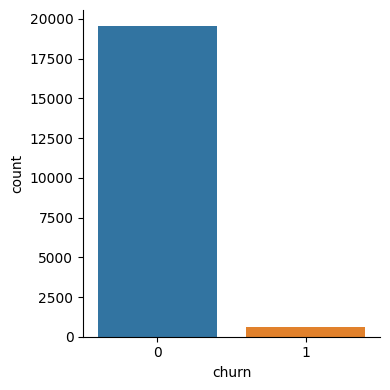

In [145]:
# Checking class imbalance
sns.catplot(x="churn", kind="count", data=df_data, height=4, aspect=1)

In [146]:
def num_col_univariate_analysis(c):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(y=c, data=df_data)
    plt.show()

In [147]:
def num_col_bivariate_analysis(c1,c2):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(x=c1, y=c2, data=df_data)
    plt.show()

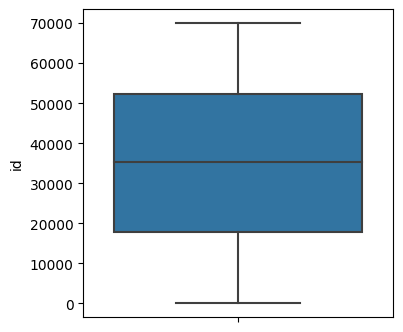

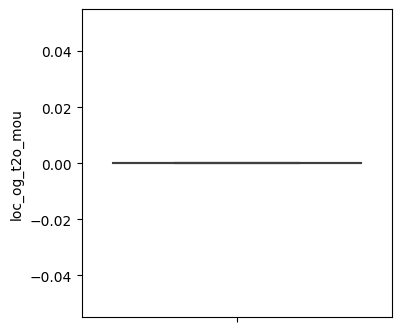

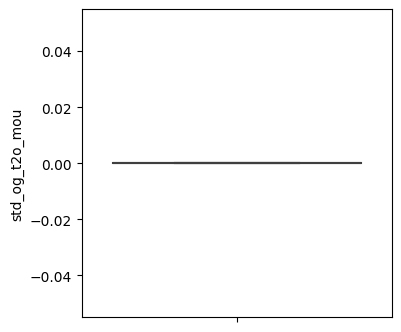

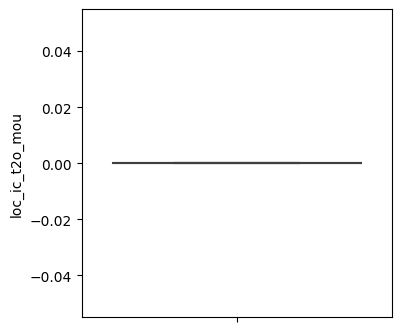

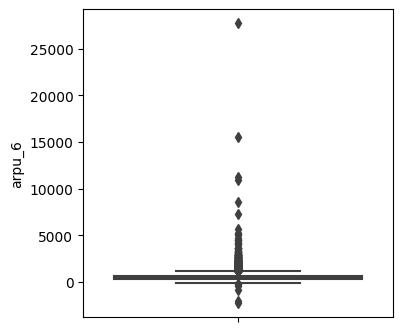

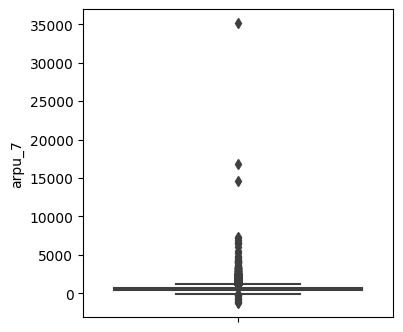

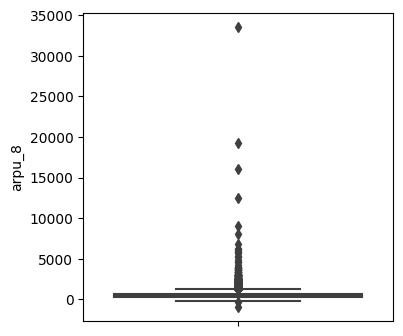

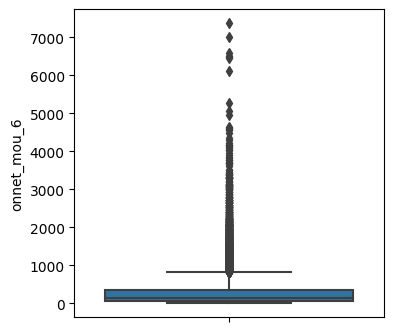

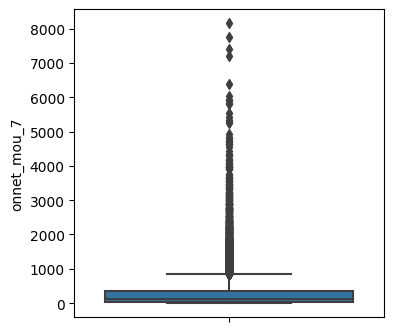

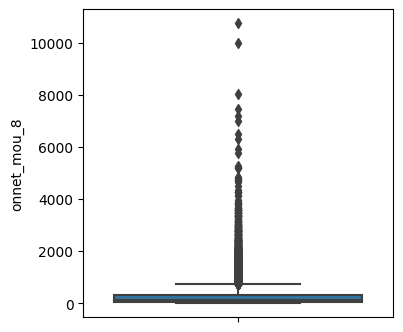

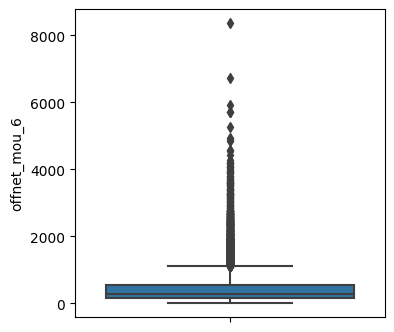

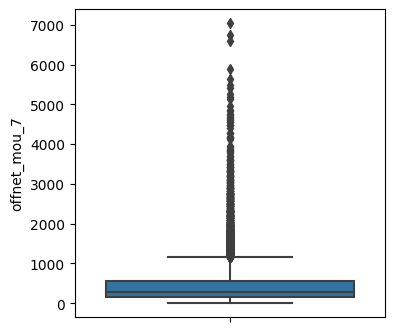

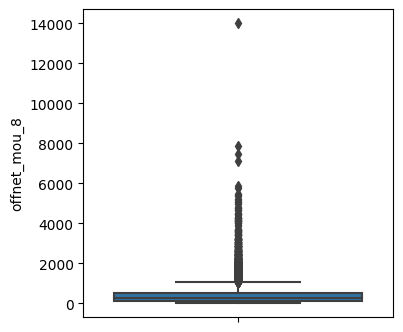

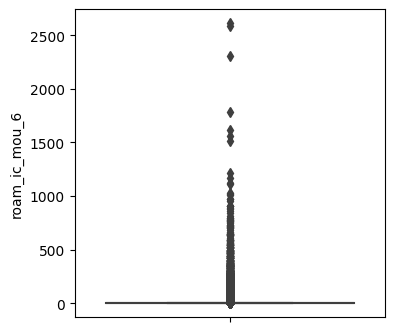

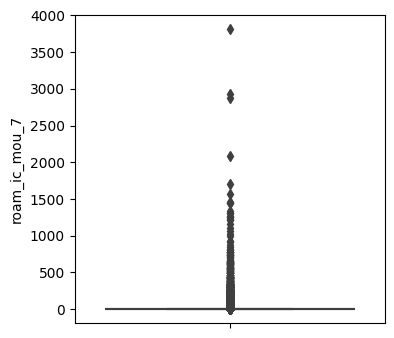

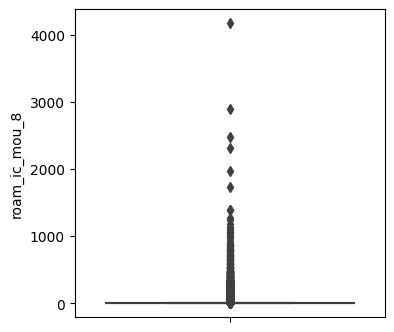

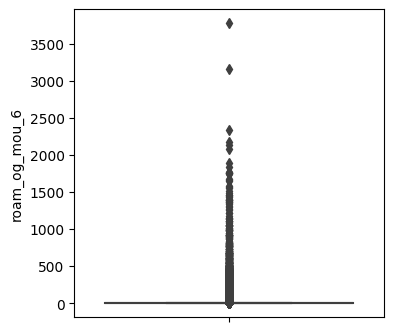

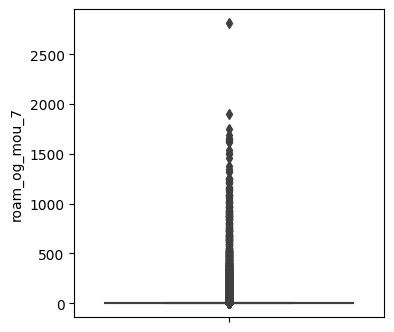

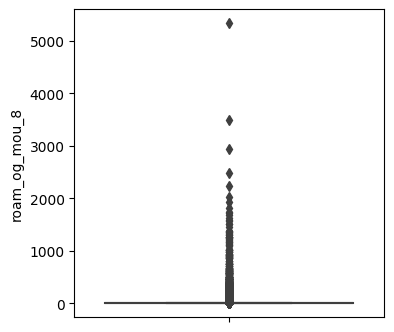

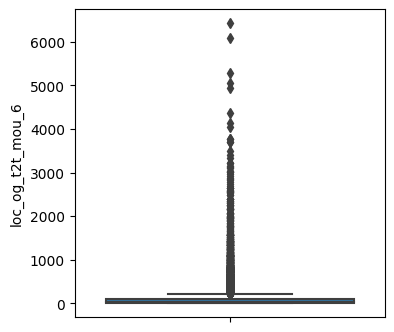

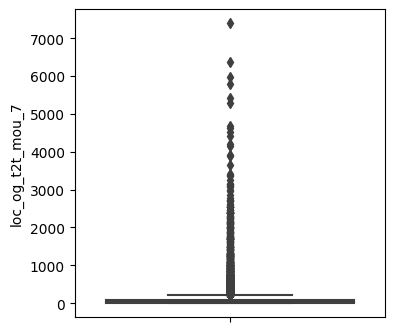

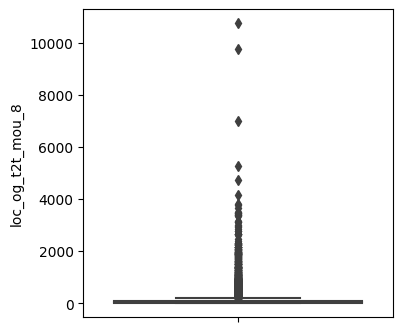

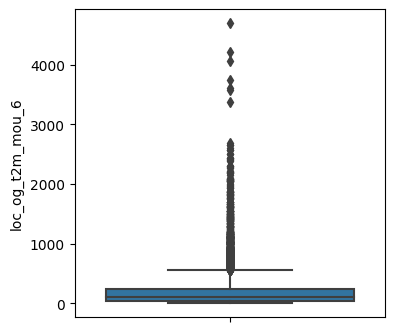

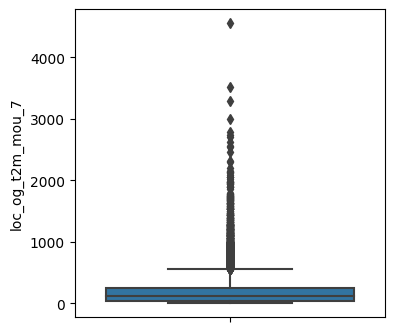

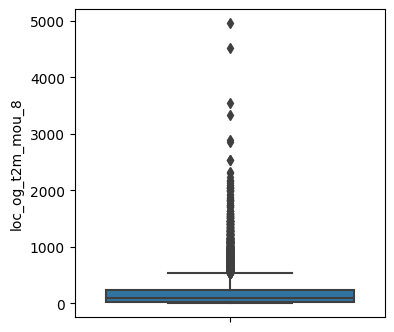

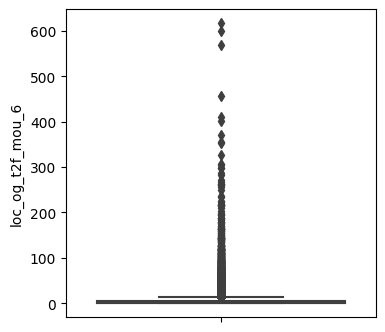

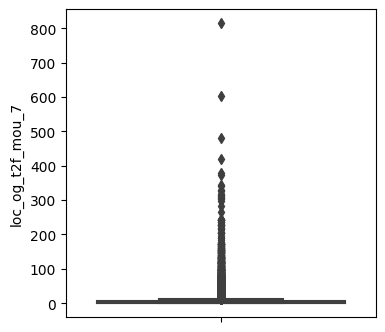

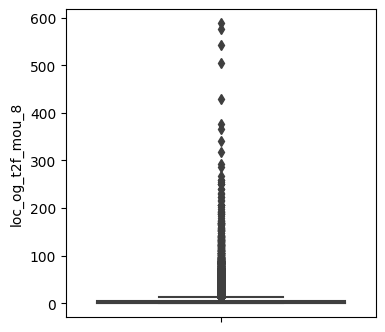

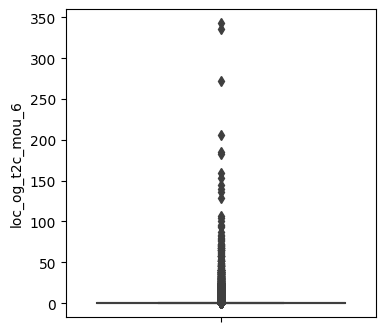

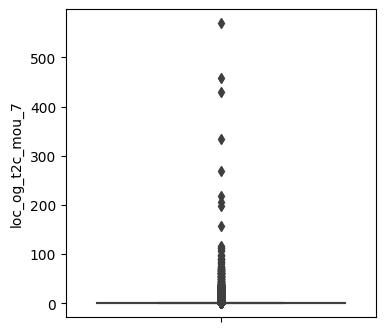

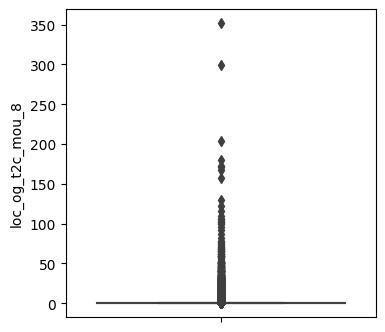

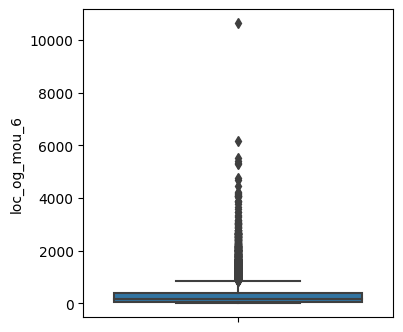

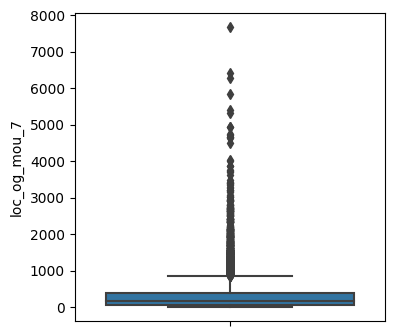

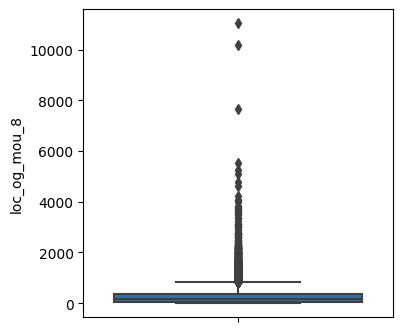

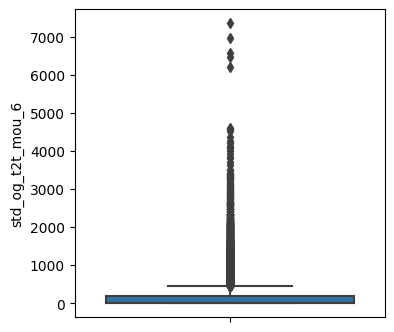

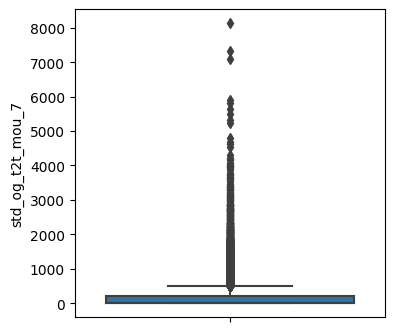

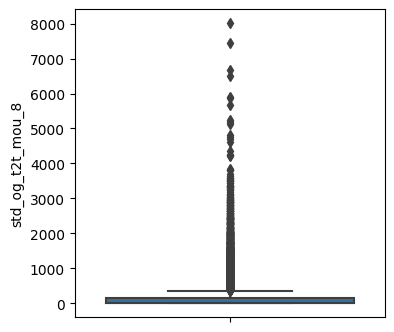

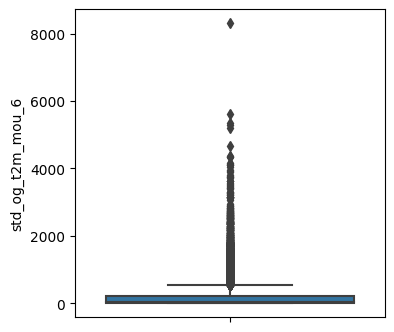

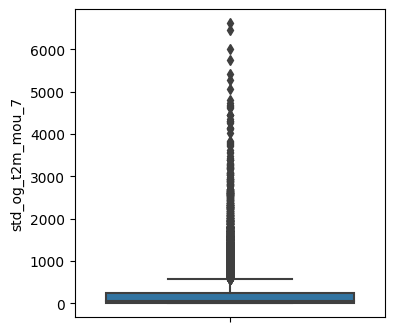

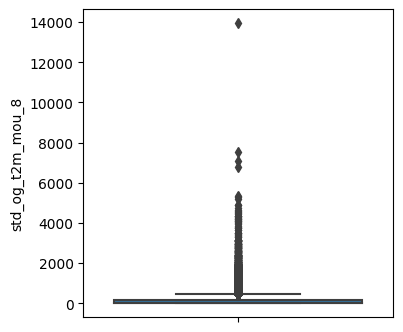

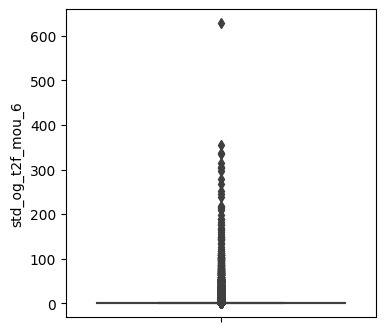

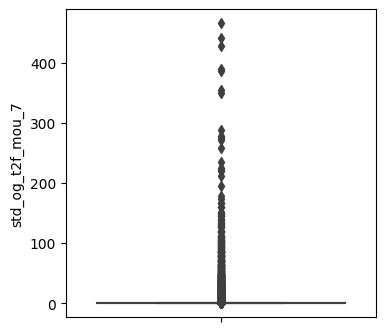

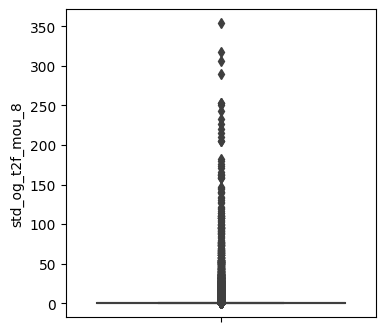

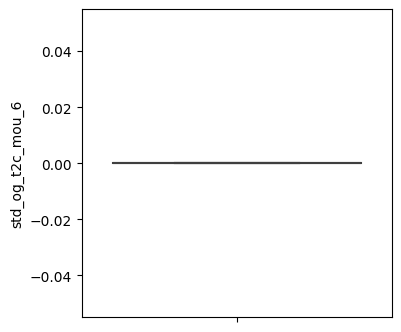

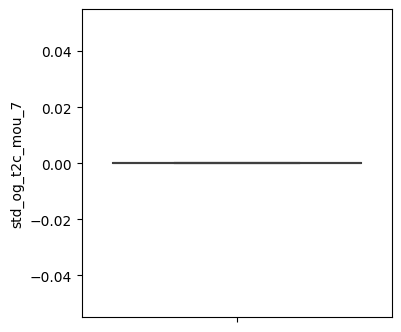

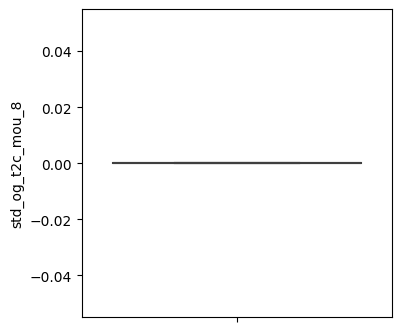

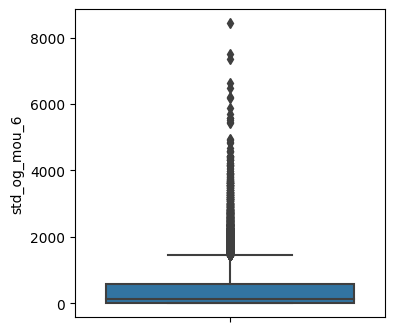

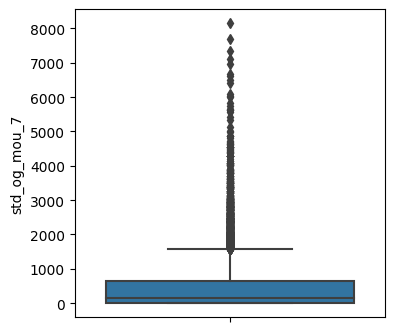

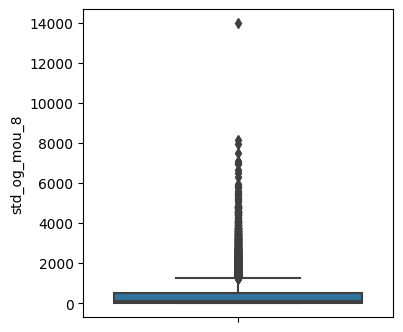

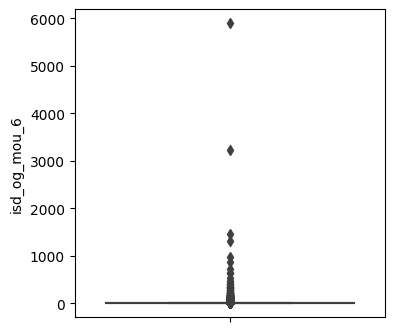

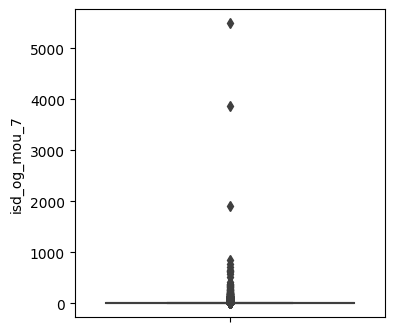

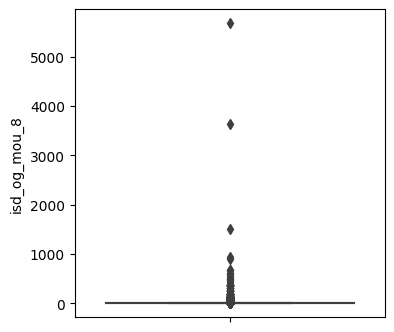

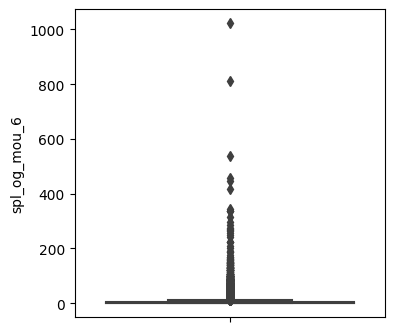

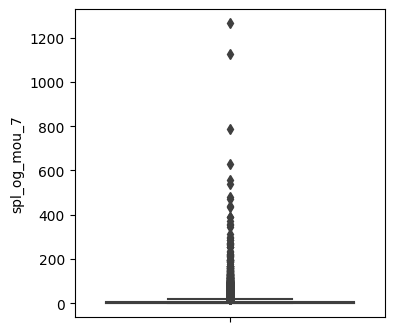

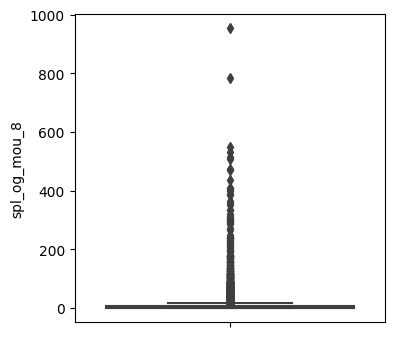

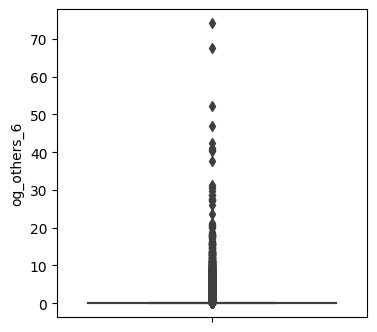

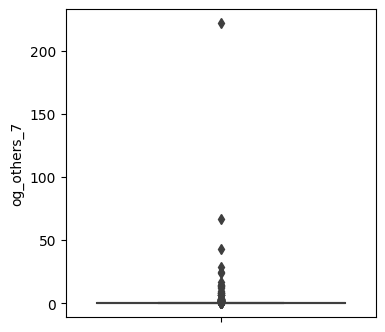

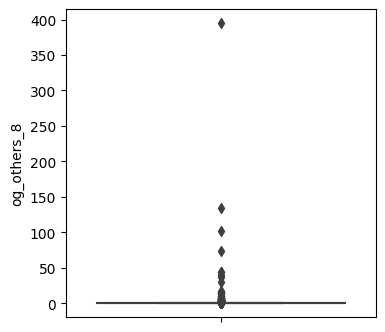

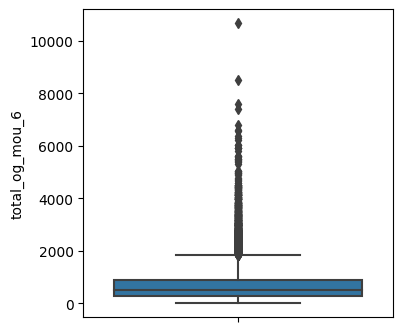

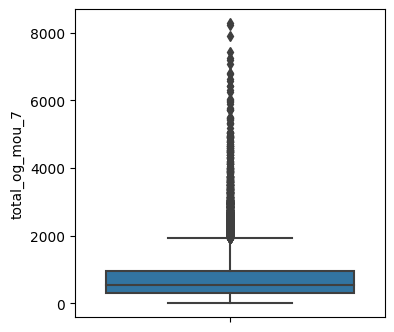

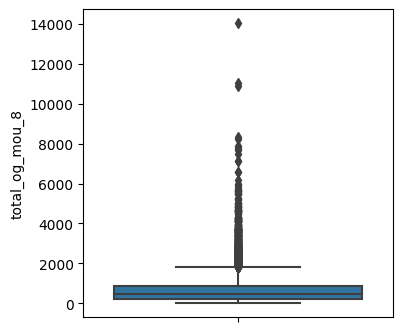

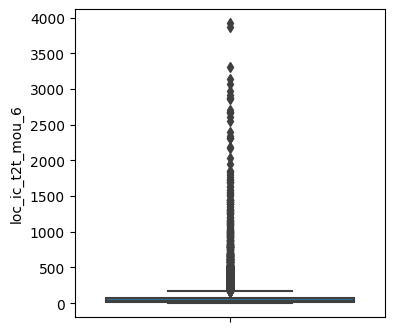

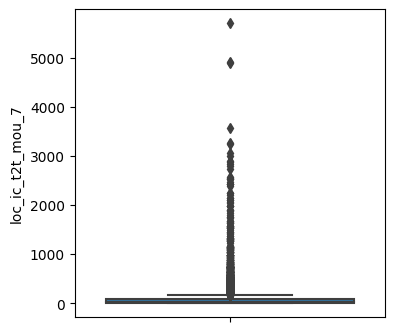

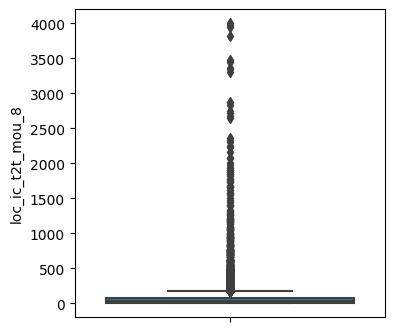

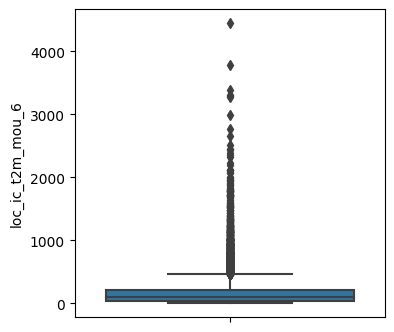

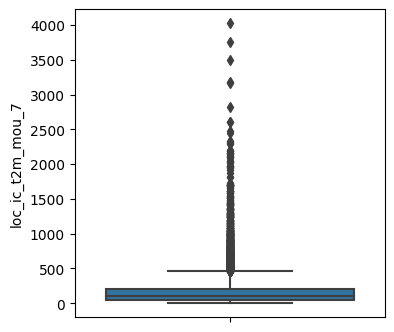

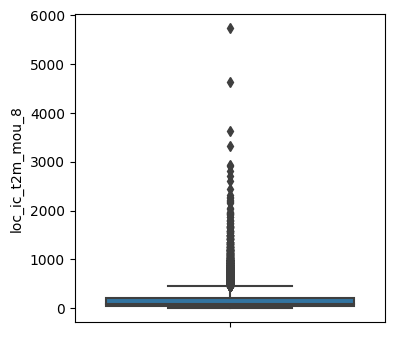

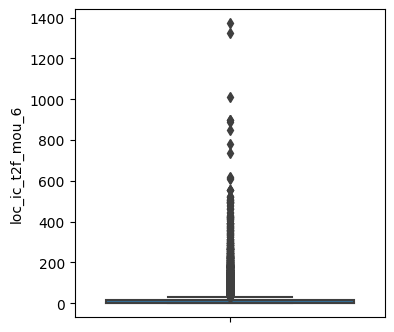

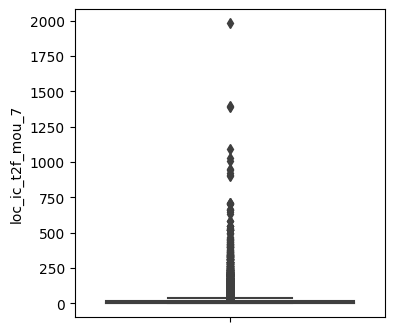

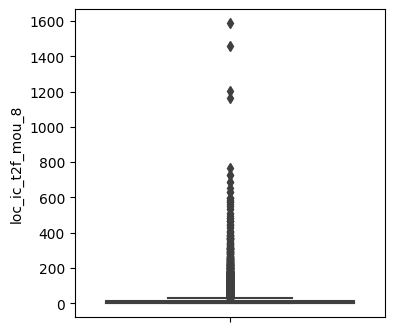

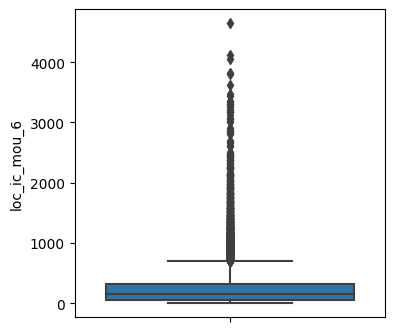

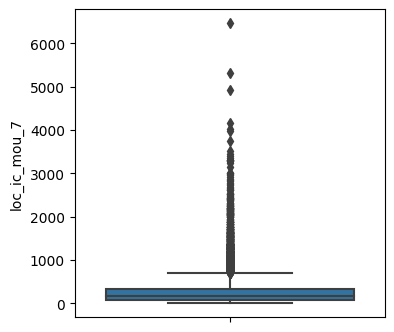

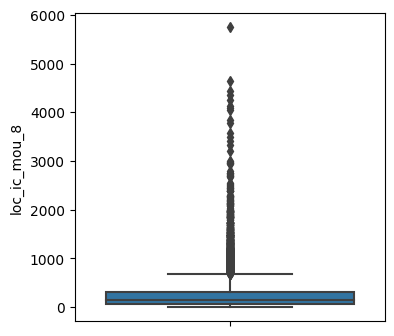

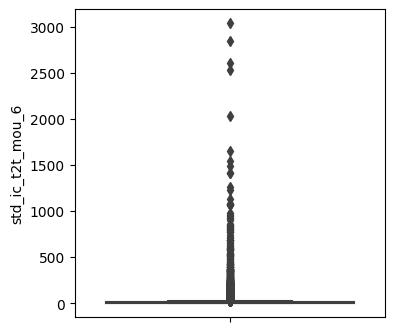

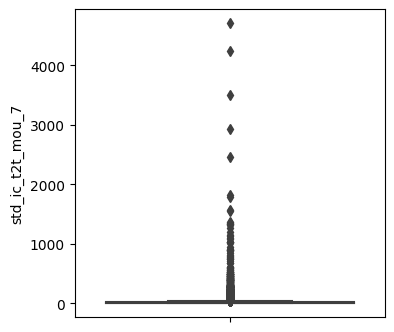

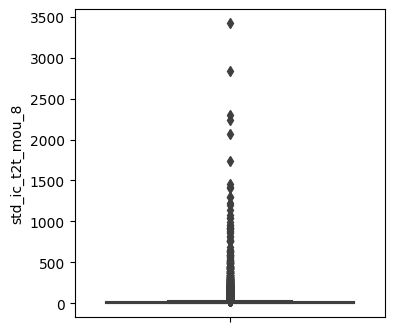

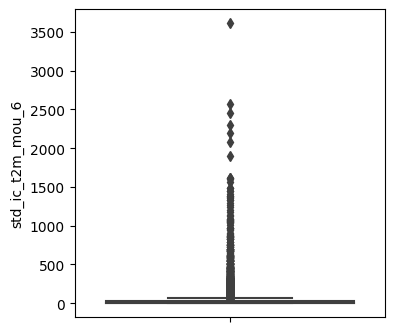

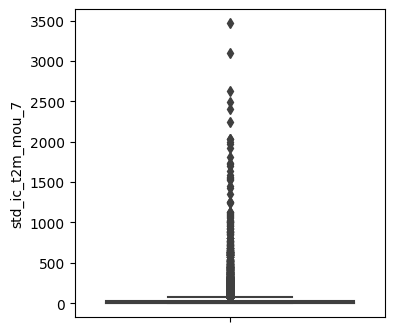

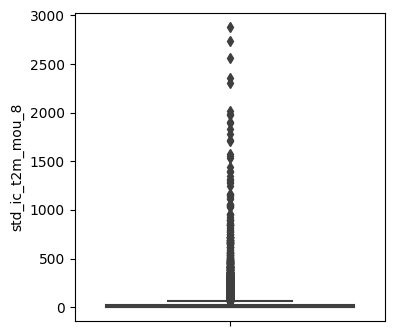

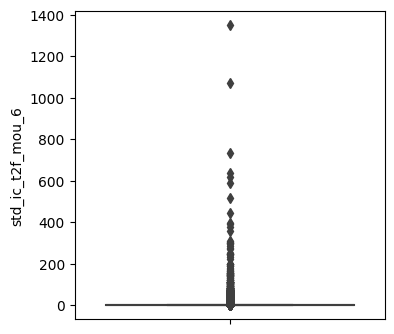

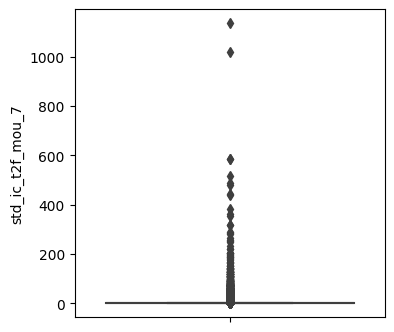

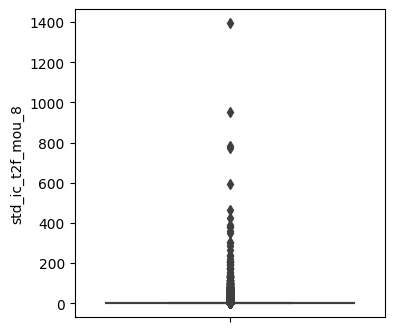

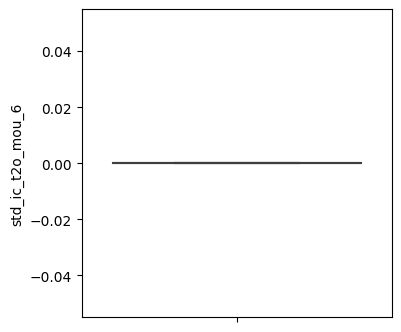

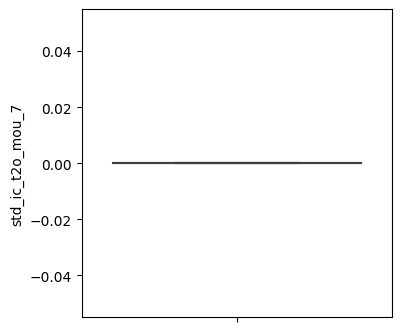

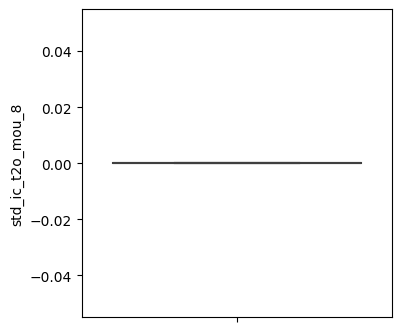

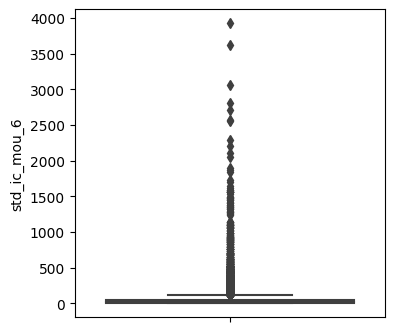

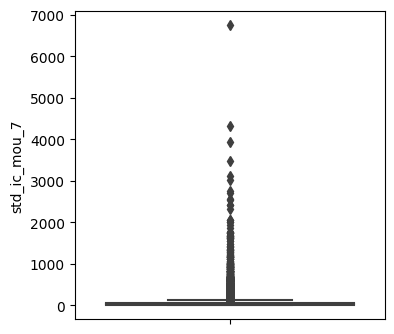

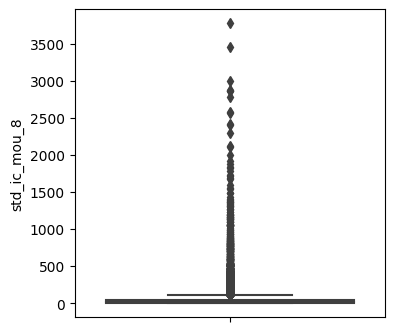

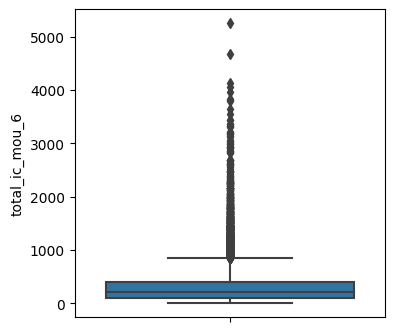

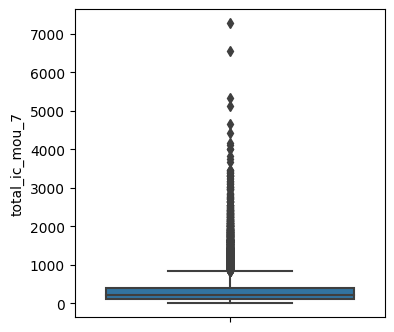

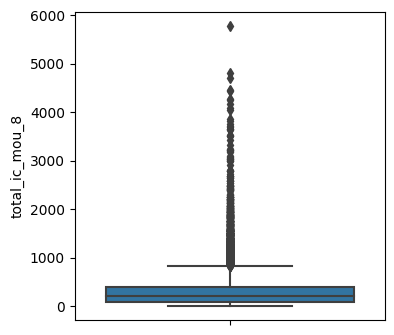

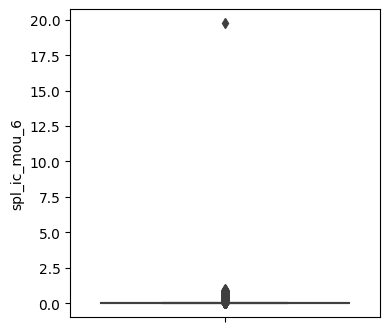

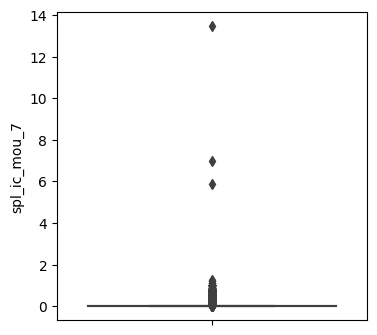

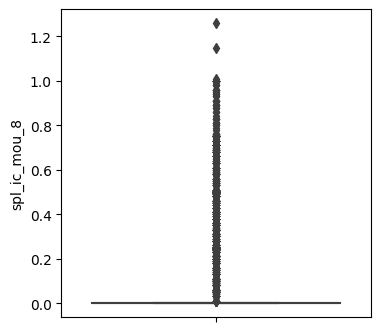

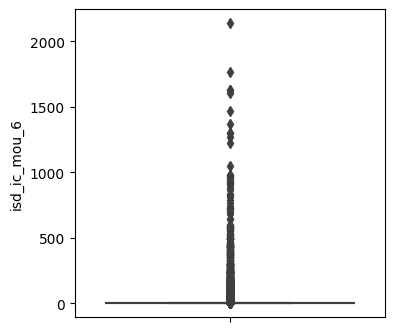

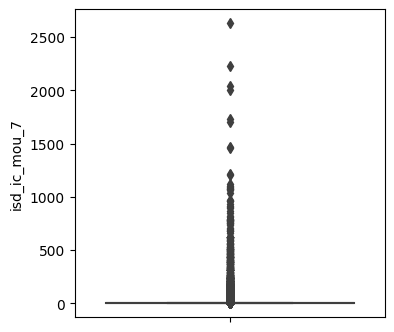

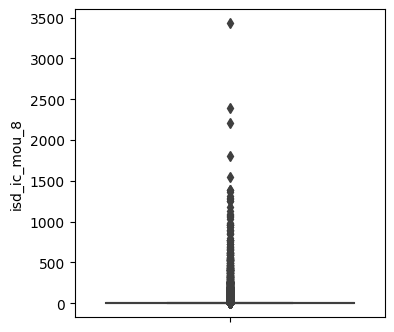

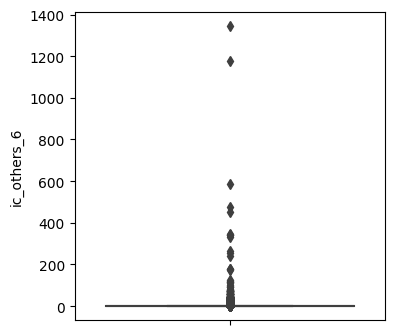

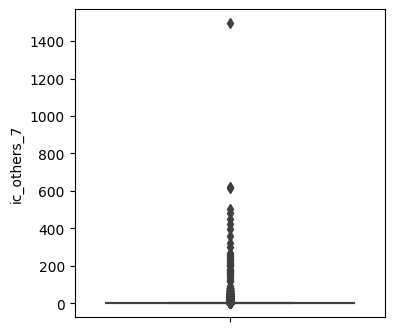

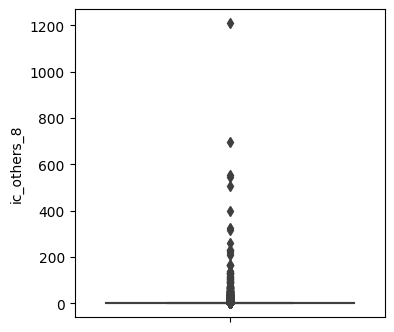

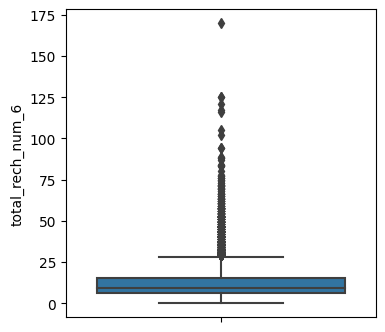

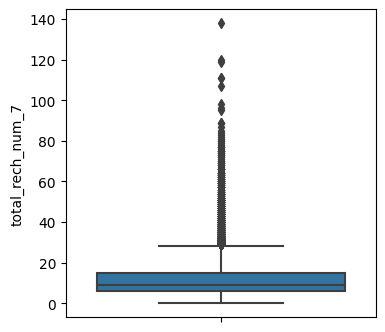

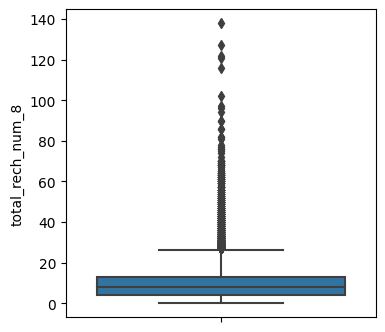

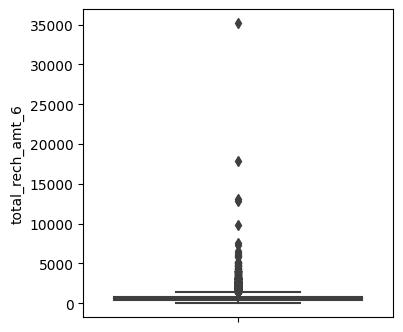

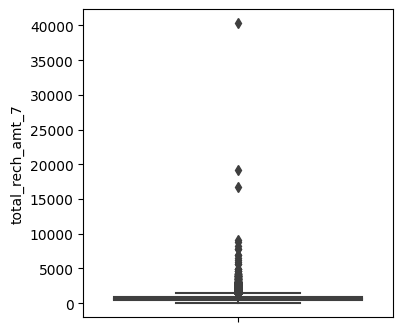

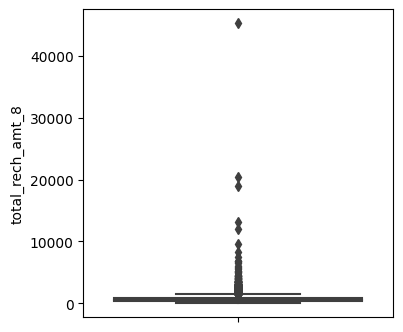

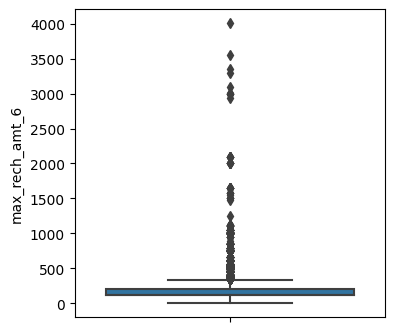

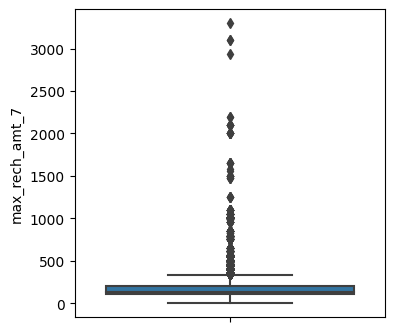

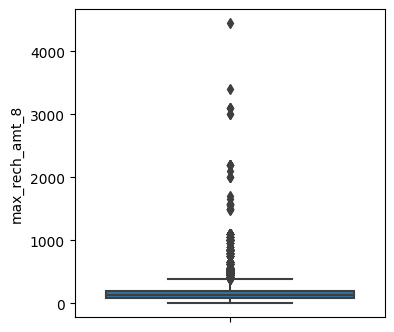

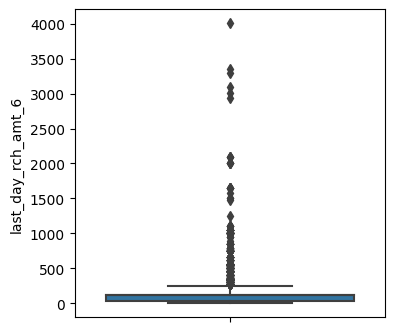

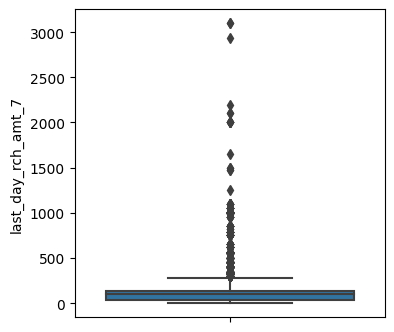

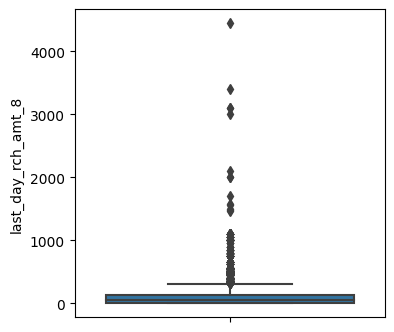

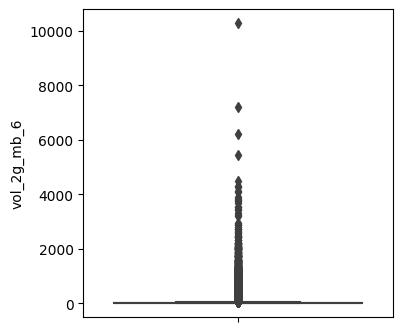

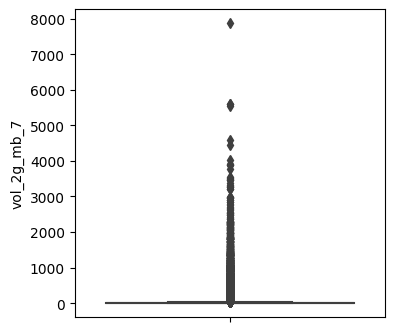

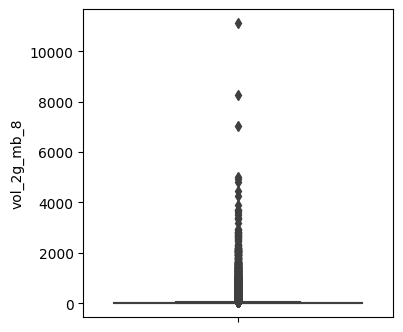

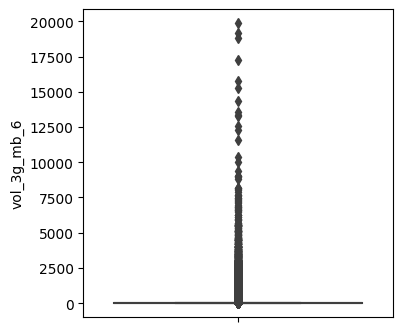

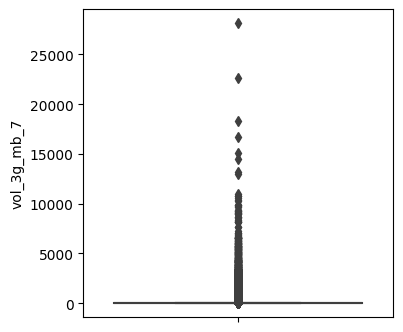

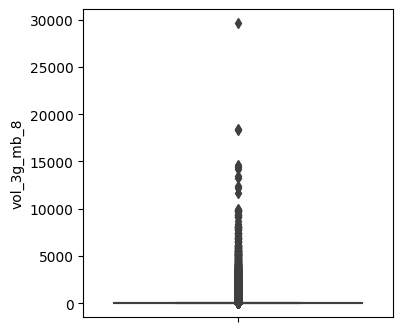

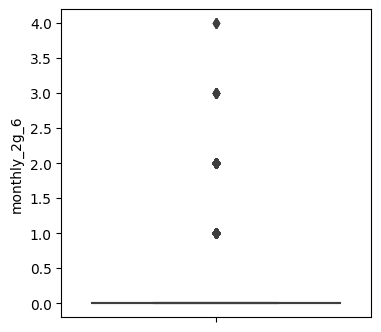

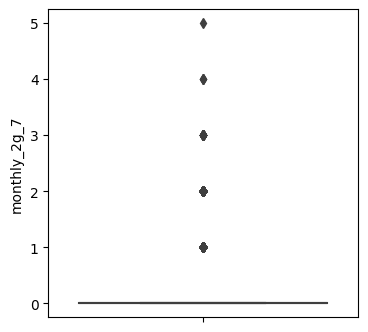

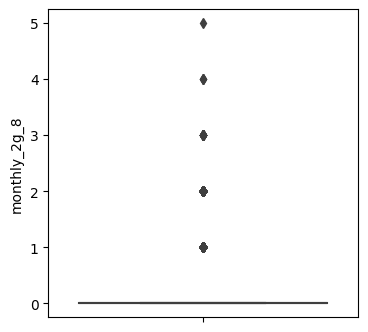

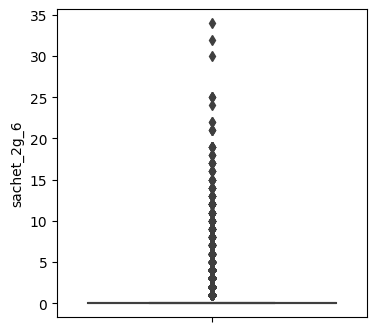

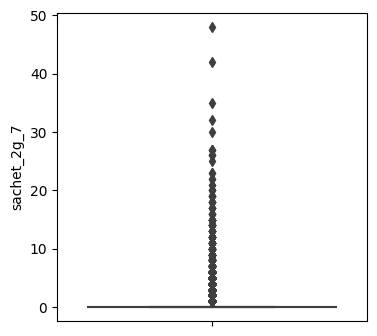

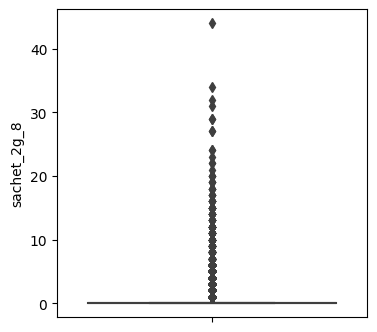

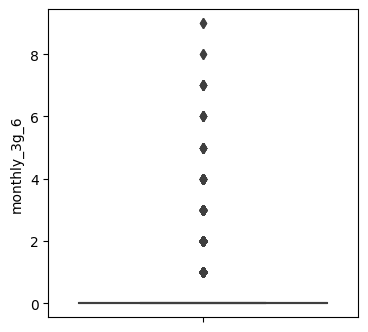

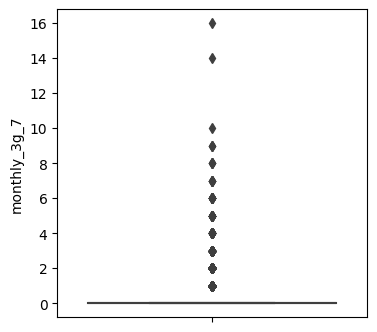

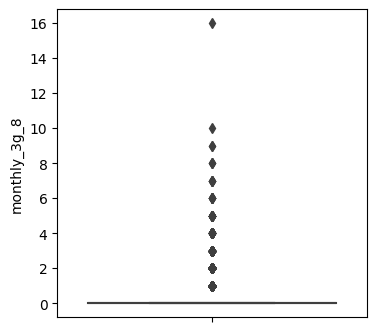

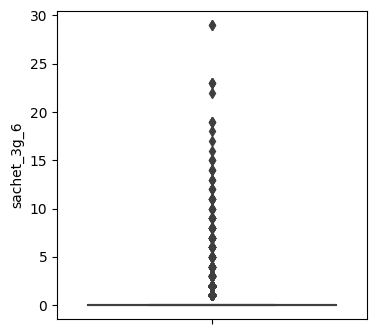

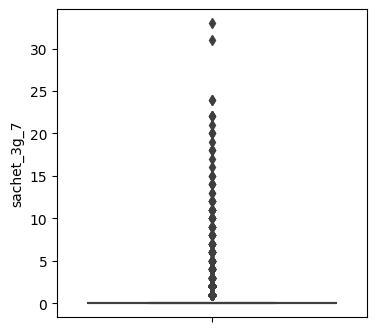

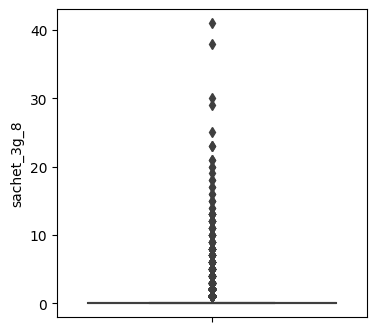

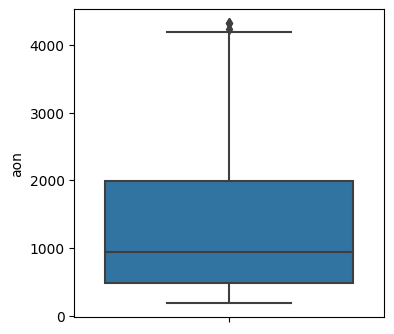

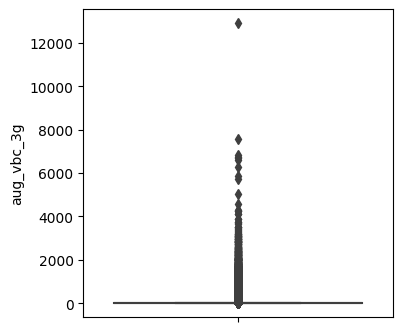

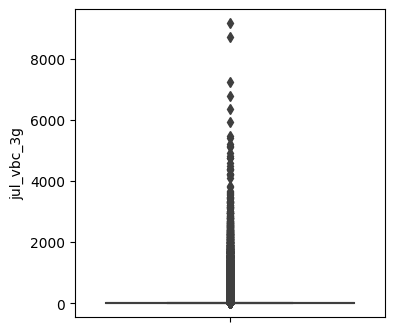

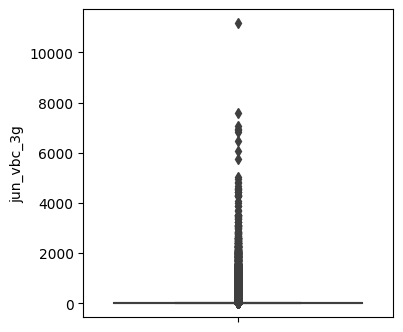

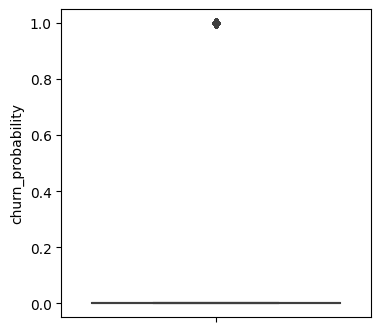

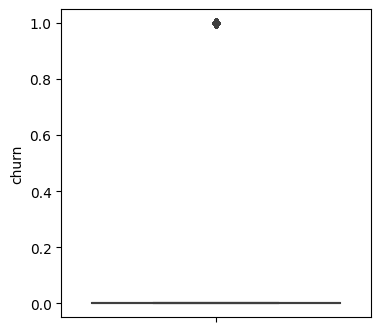

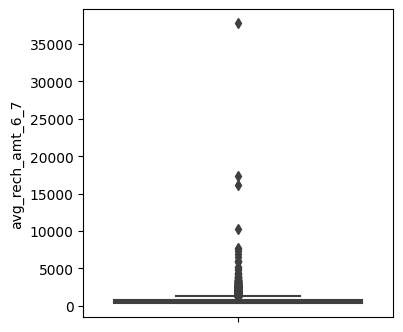

In [148]:
# Univariate Analysis of Numerical Columns
processes = []
for c in df_data.columns:
    num_col_univariate_analysis(c)

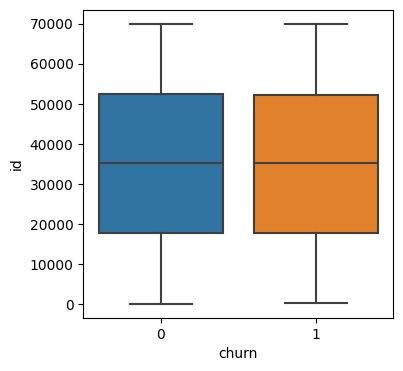

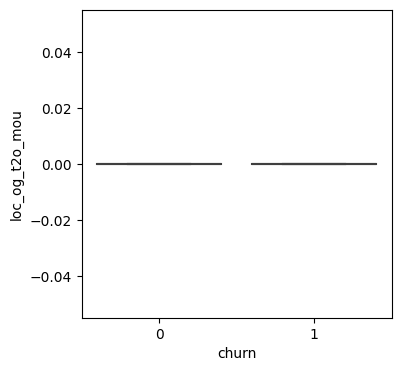

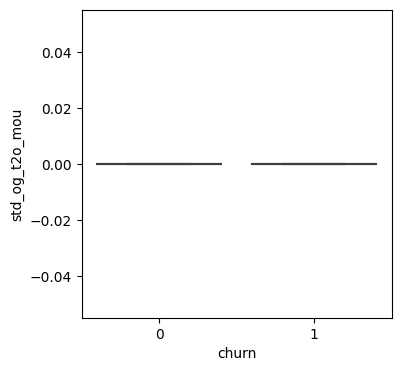

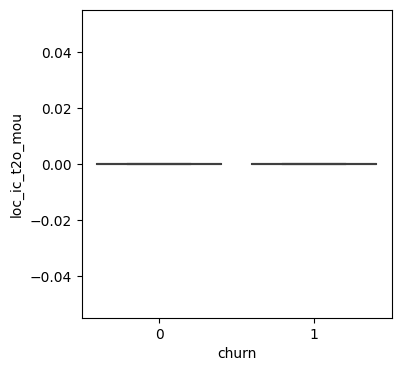

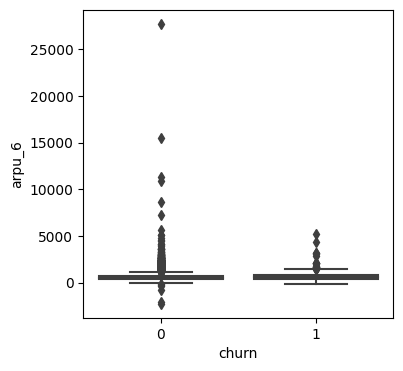

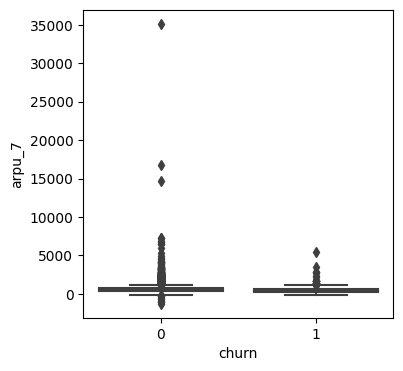

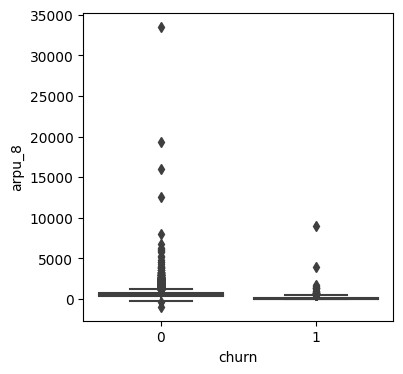

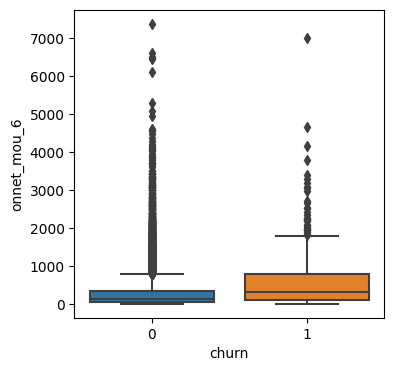

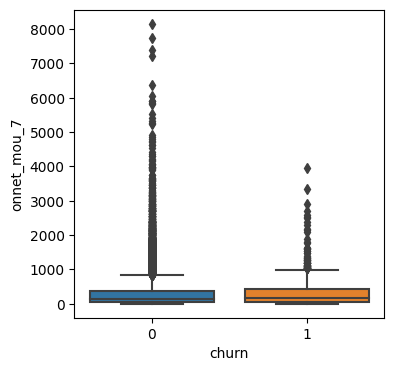

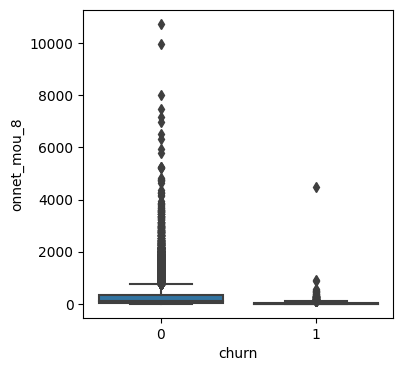

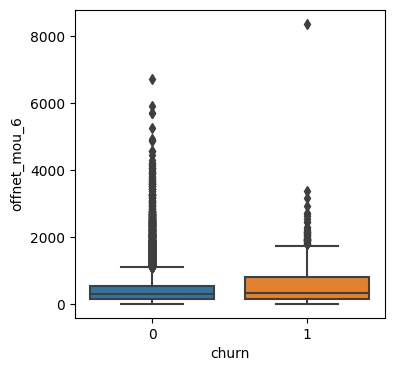

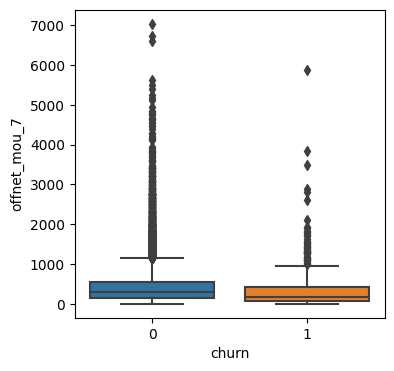

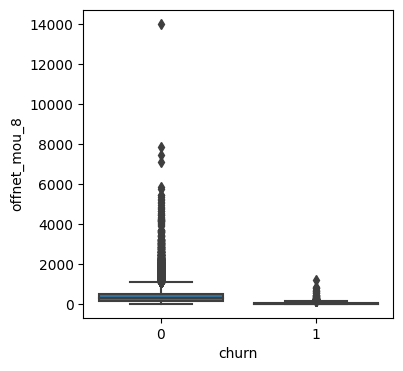

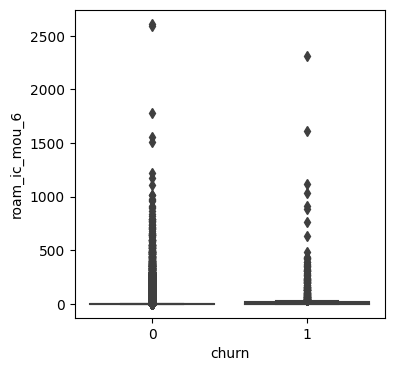

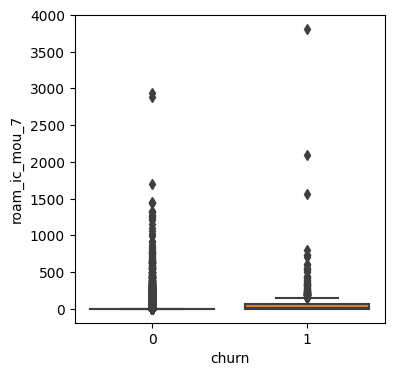

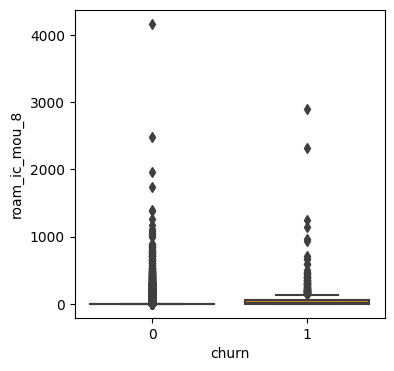

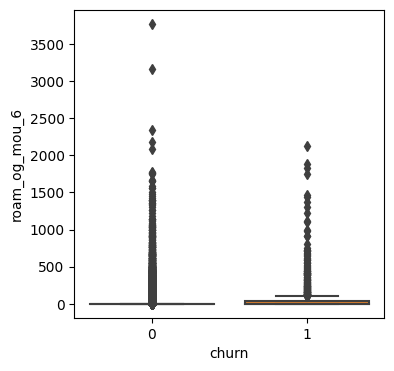

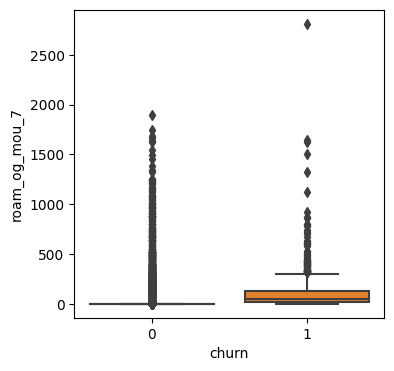

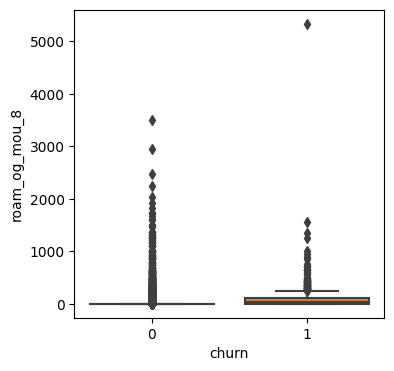

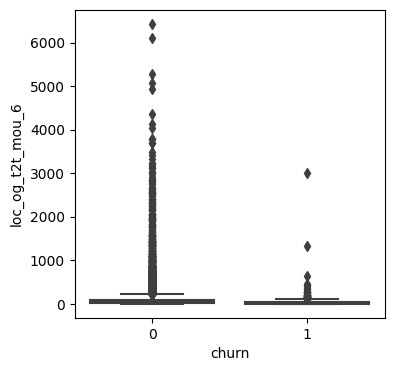

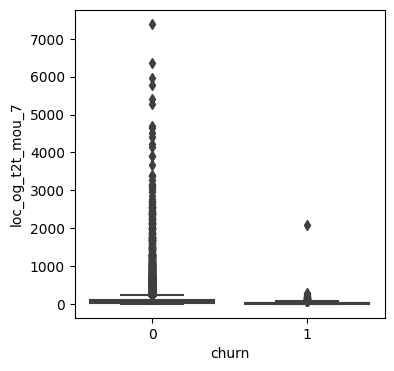

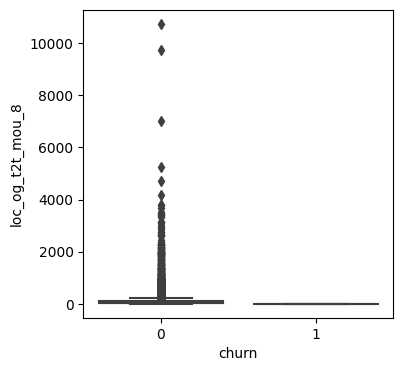

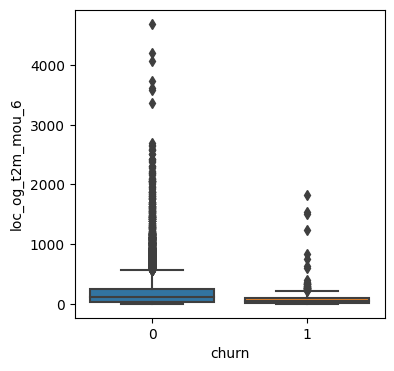

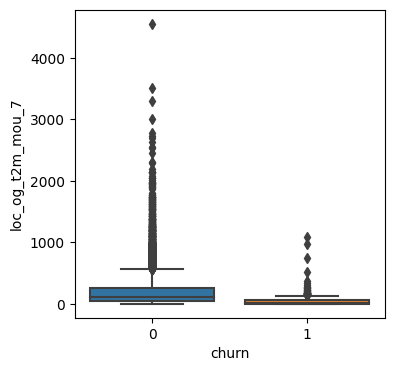

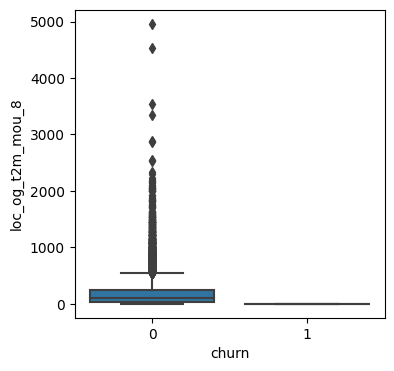

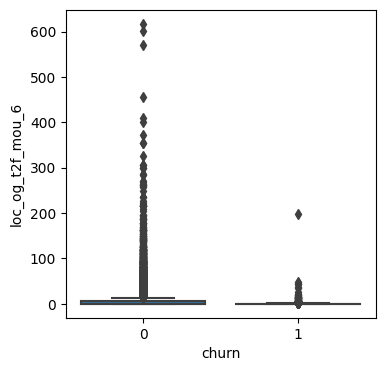

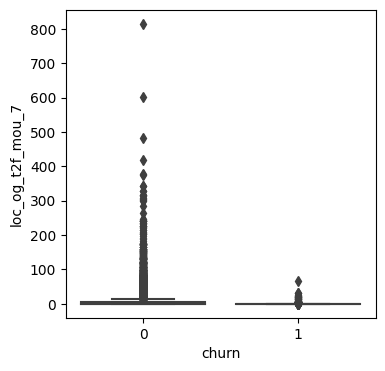

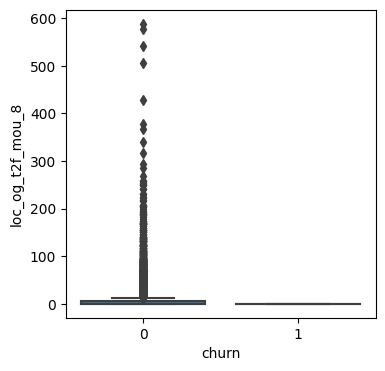

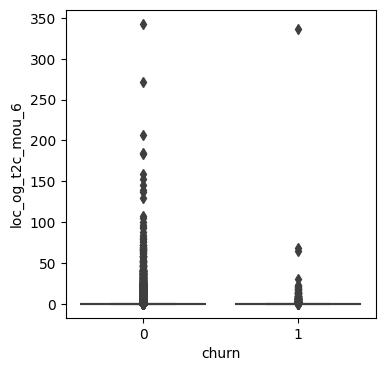

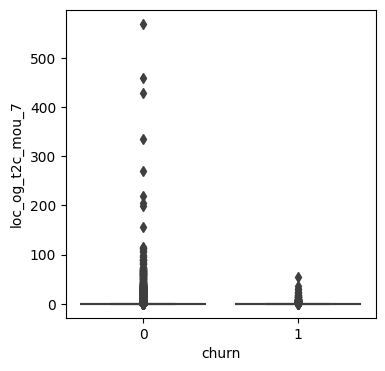

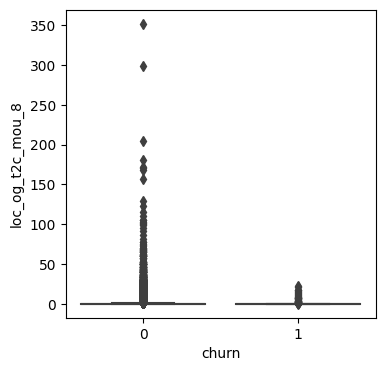

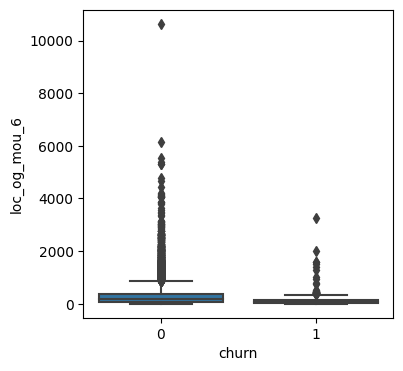

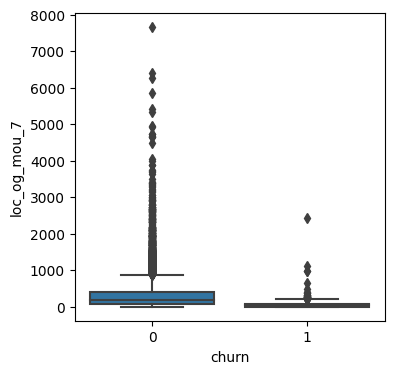

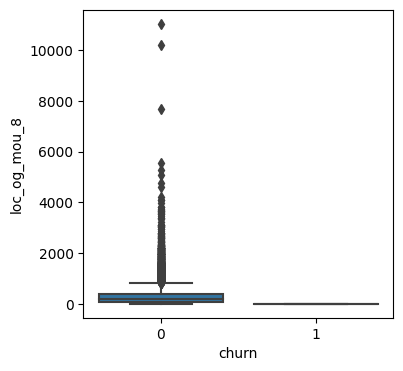

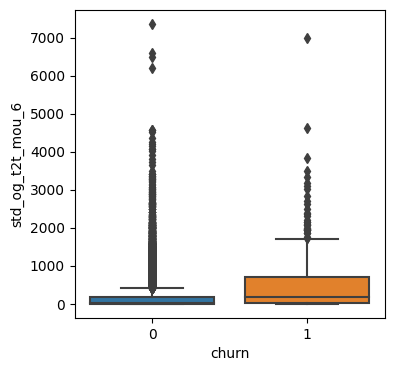

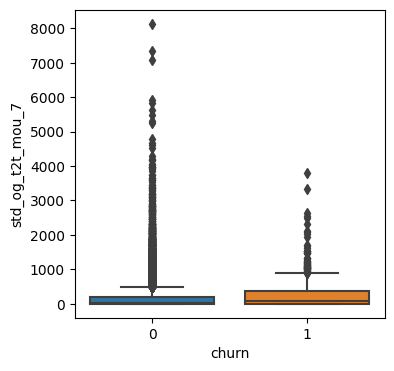

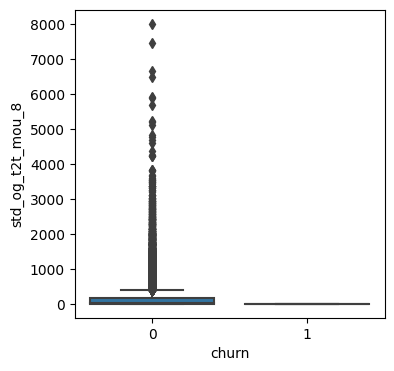

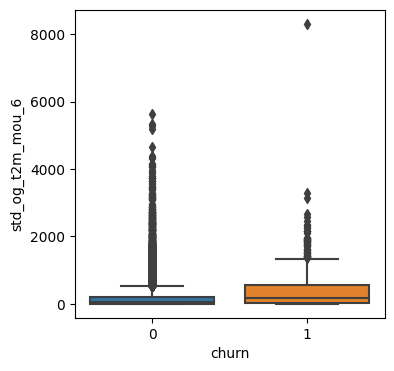

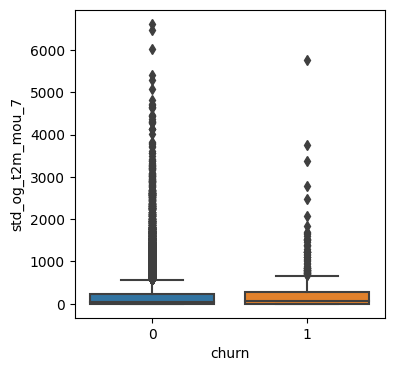

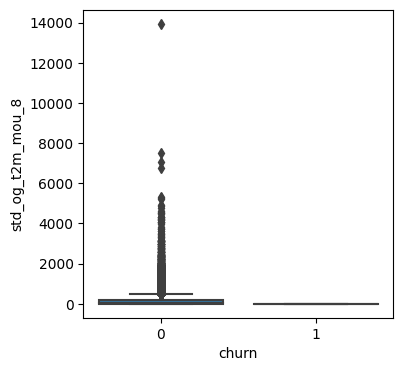

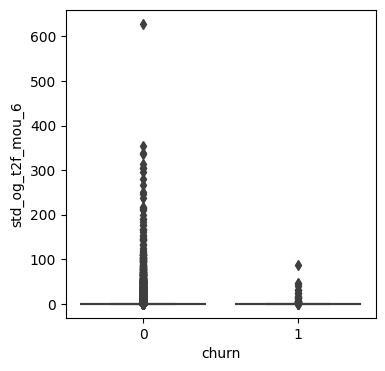

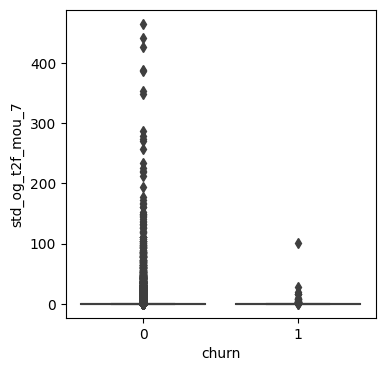

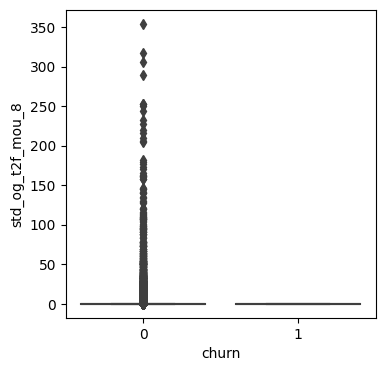

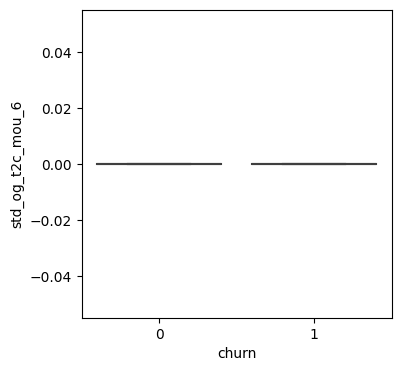

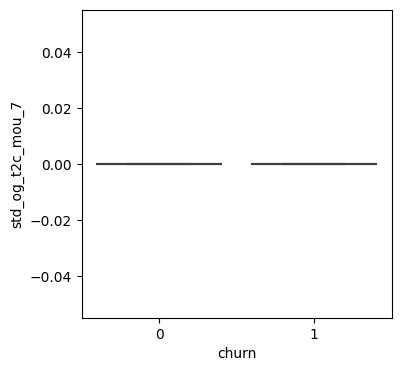

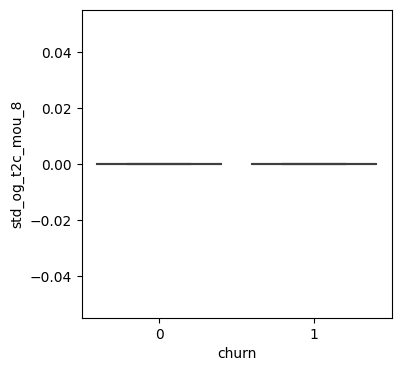

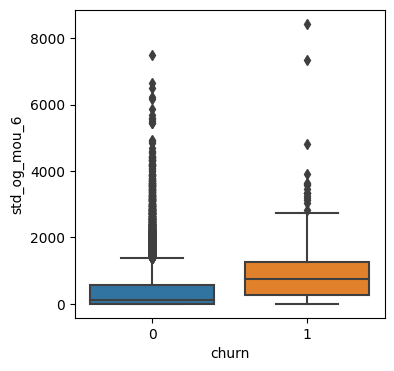

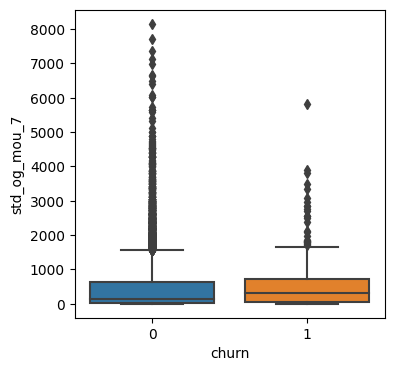

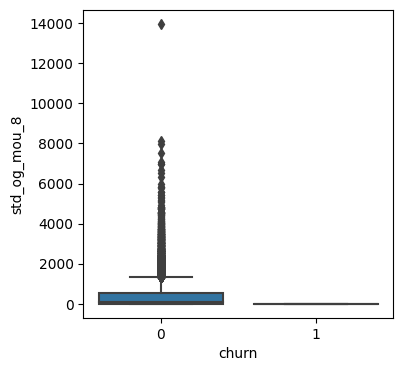

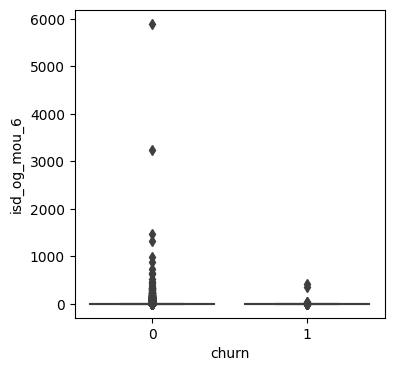

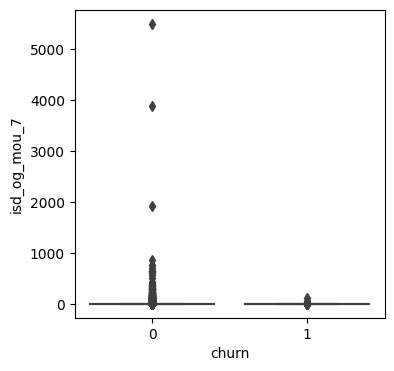

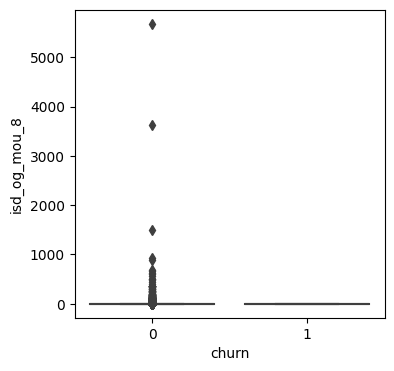

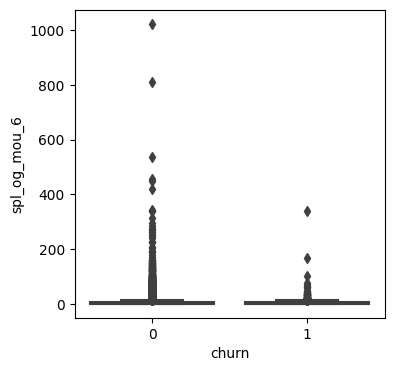

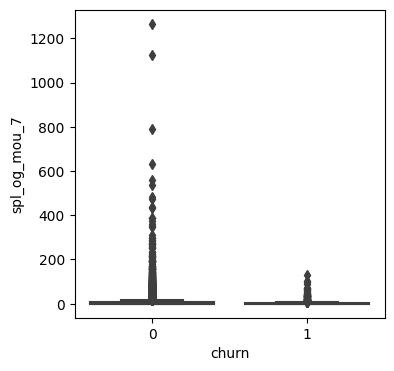

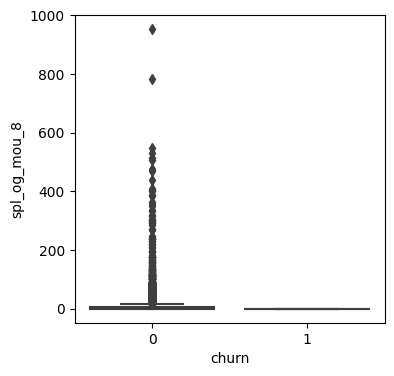

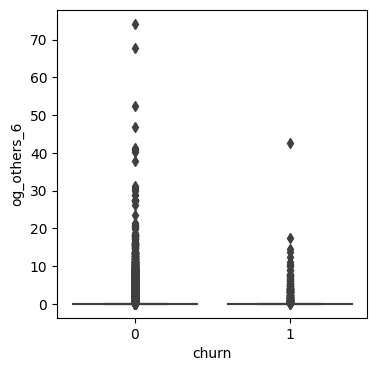

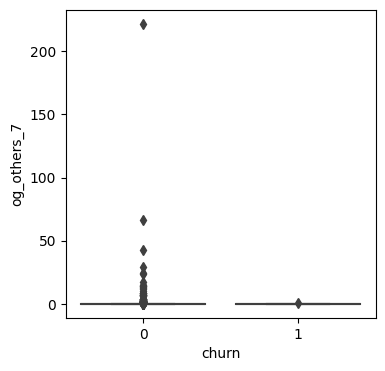

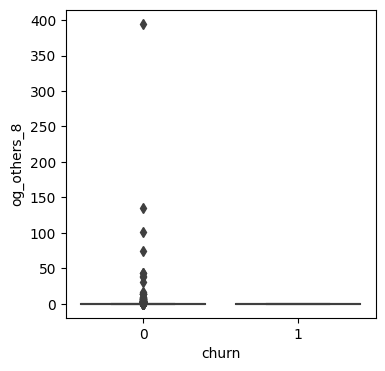

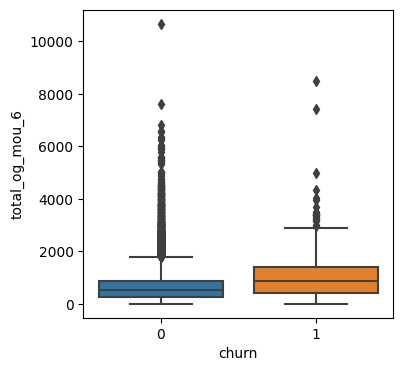

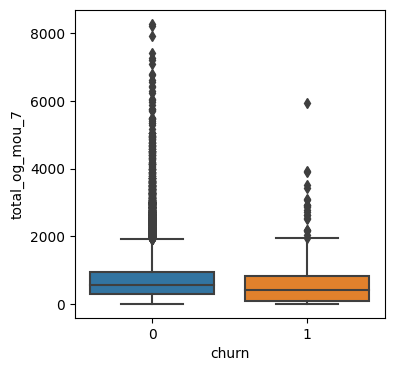

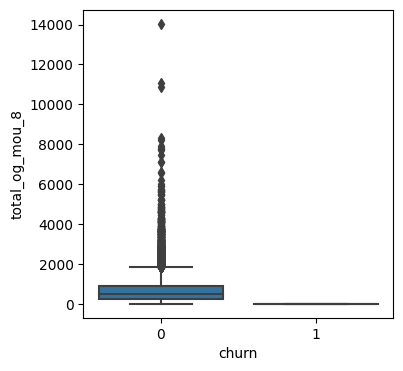

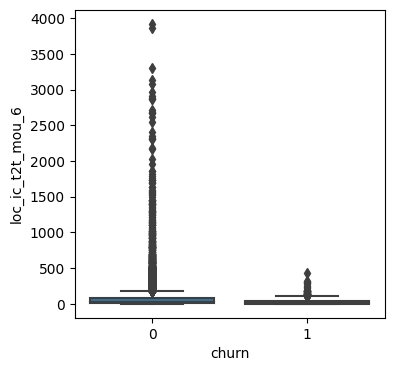

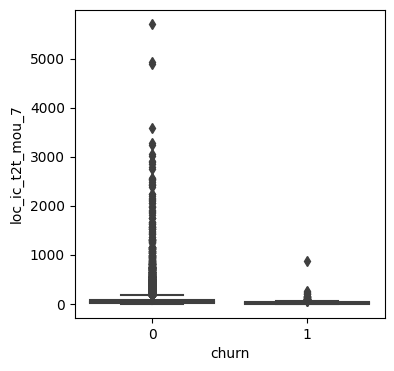

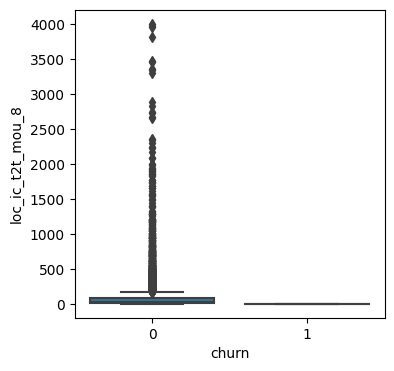

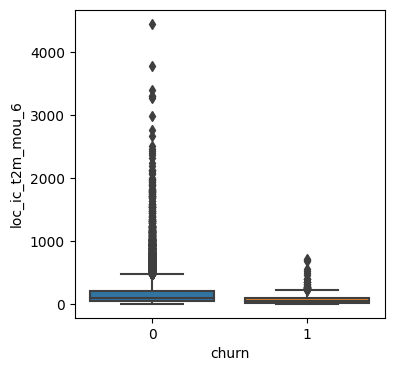

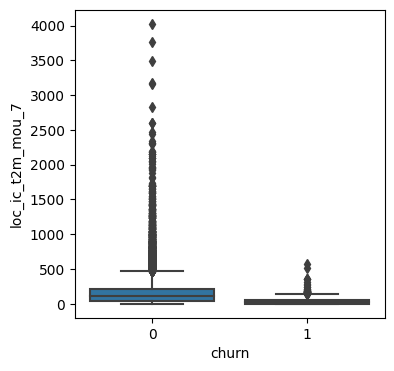

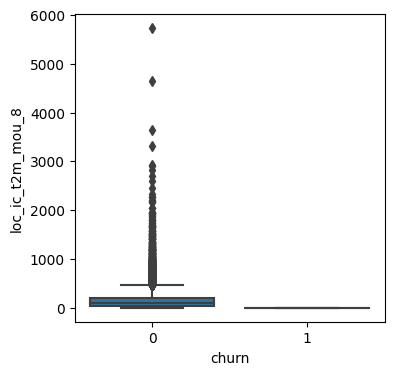

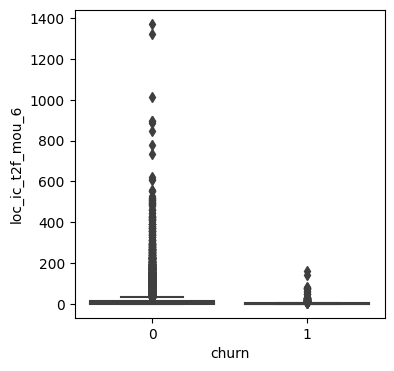

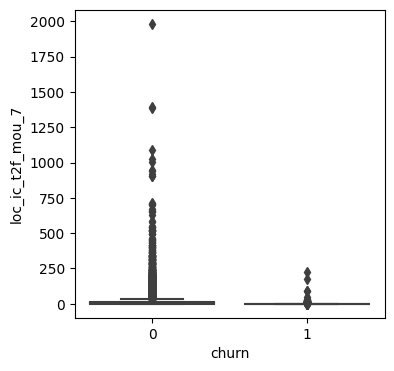

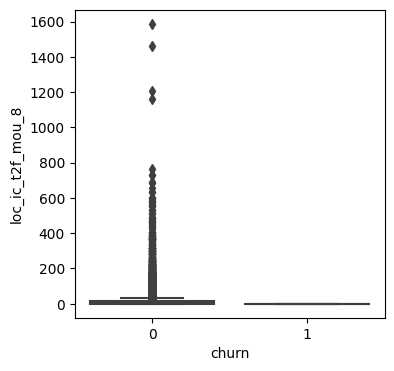

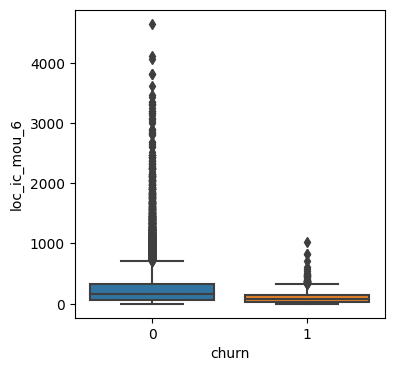

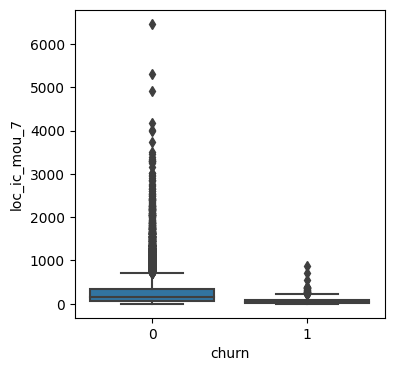

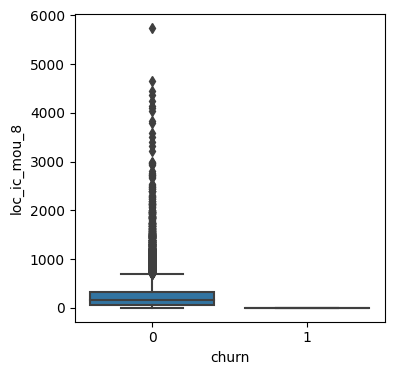

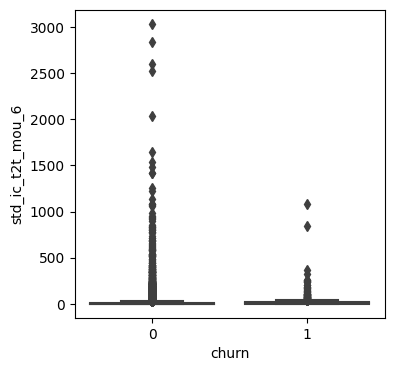

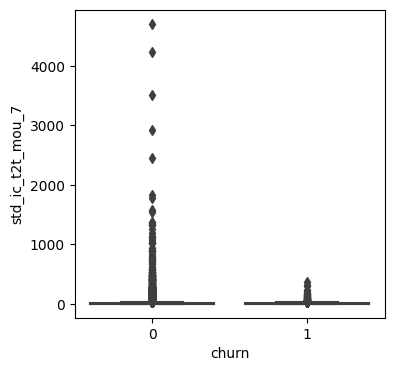

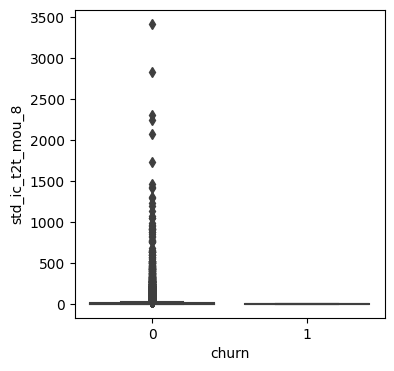

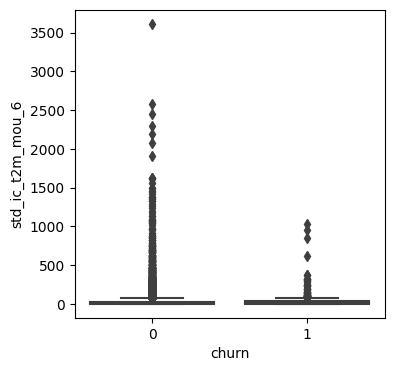

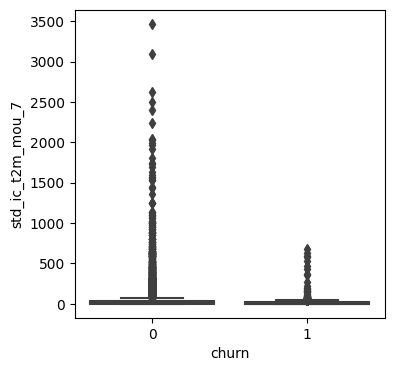

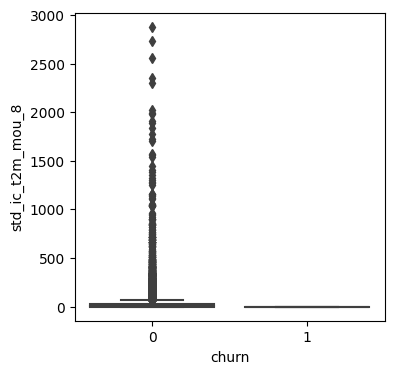

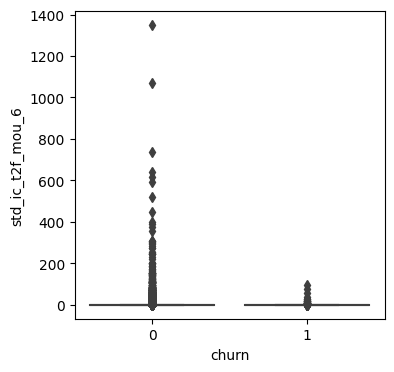

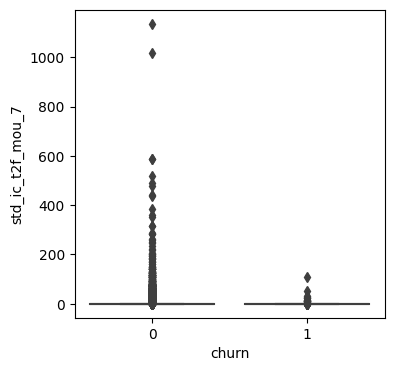

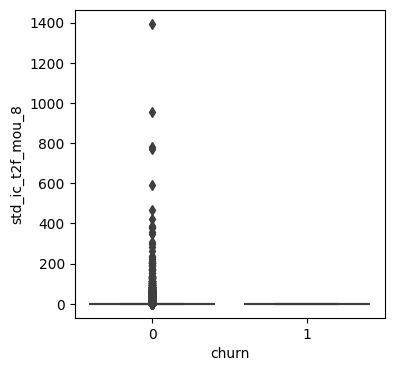

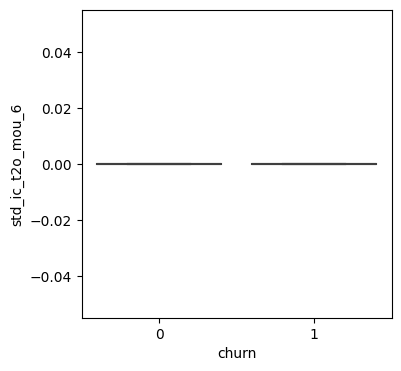

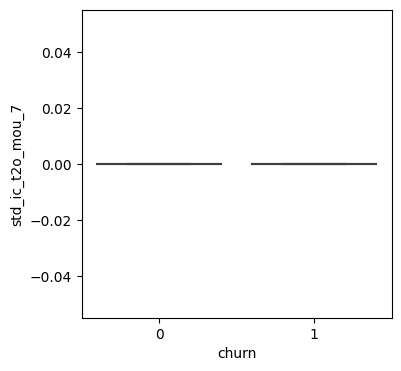

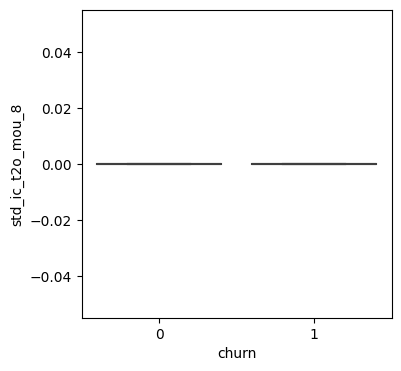

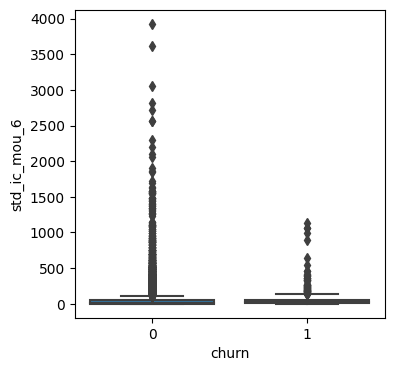

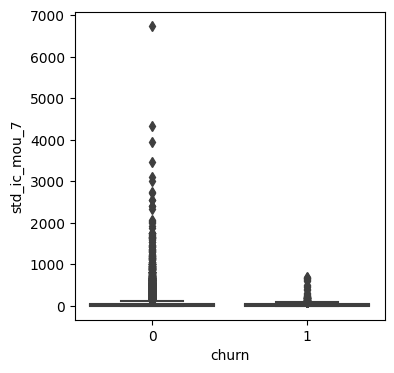

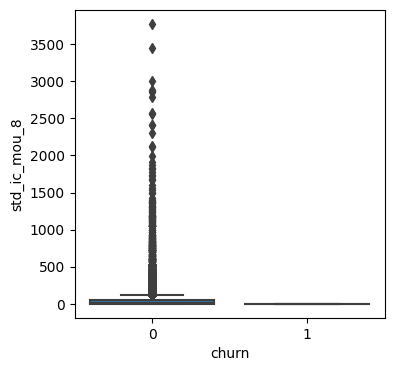

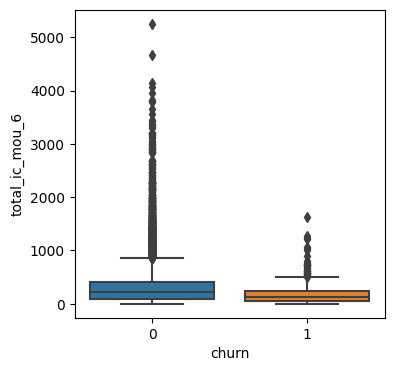

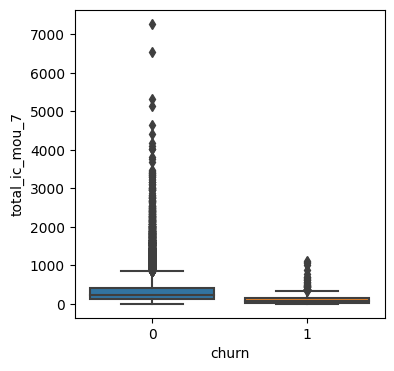

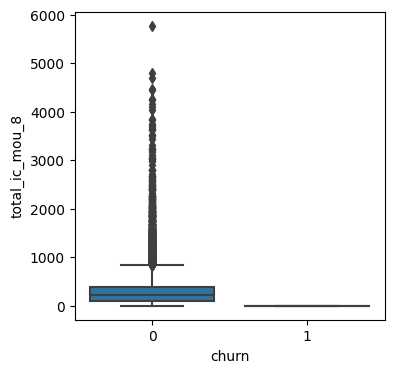

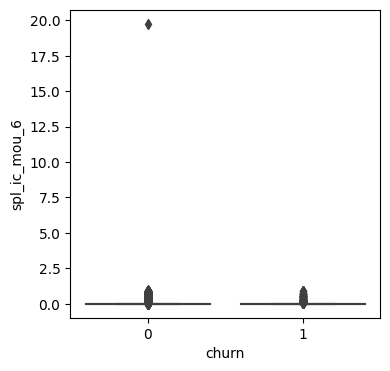

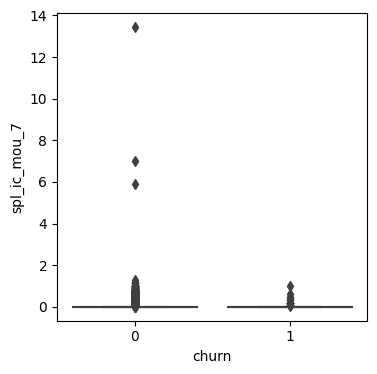

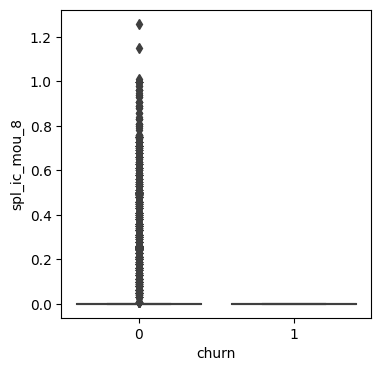

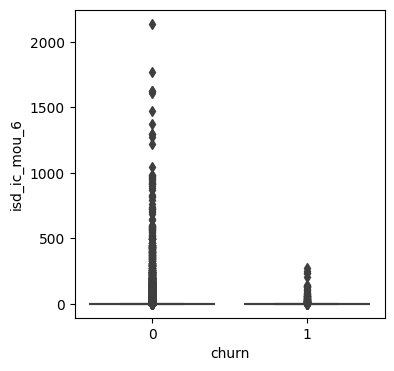

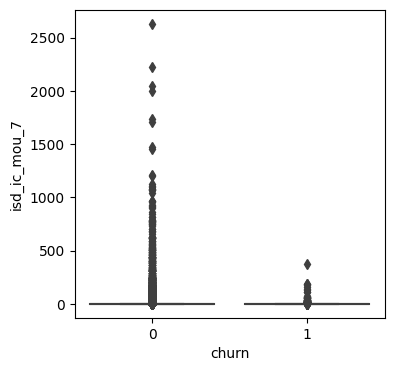

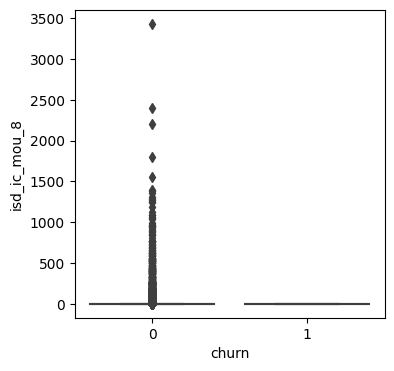

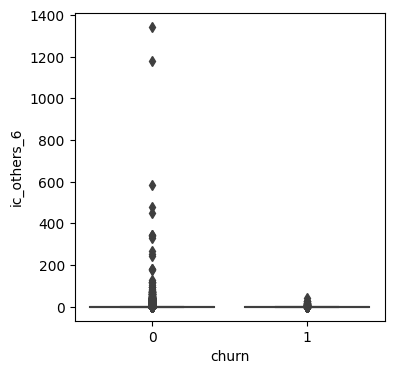

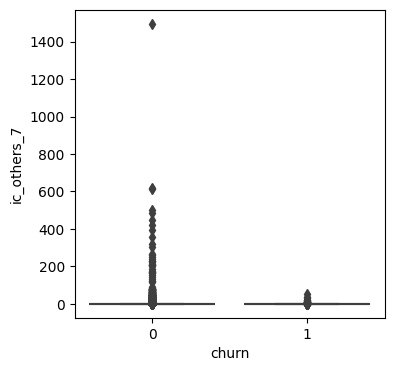

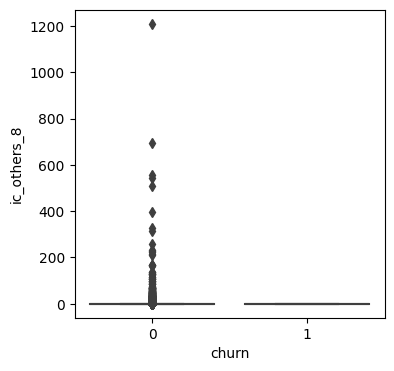

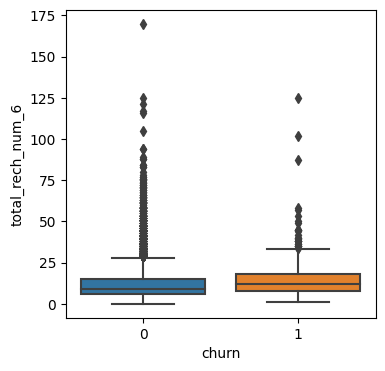

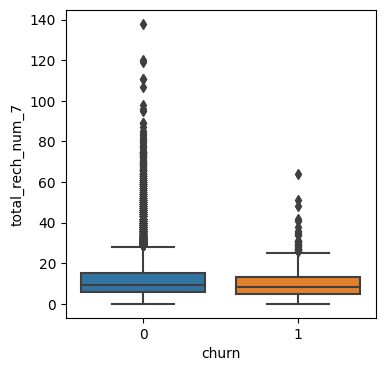

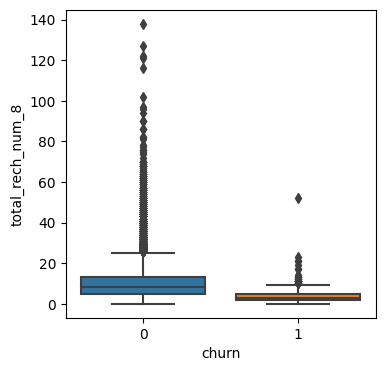

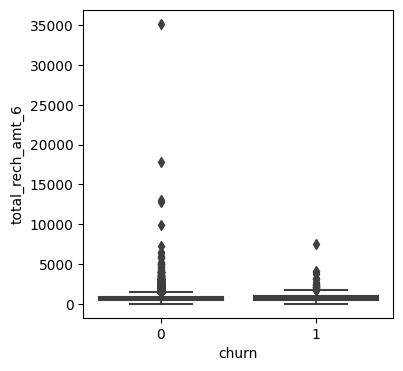

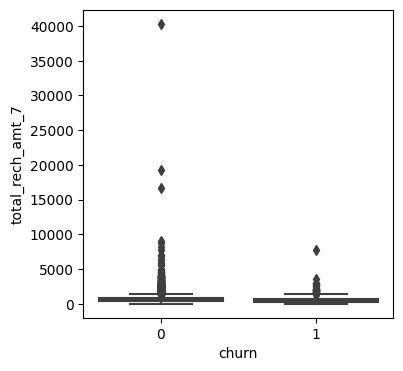

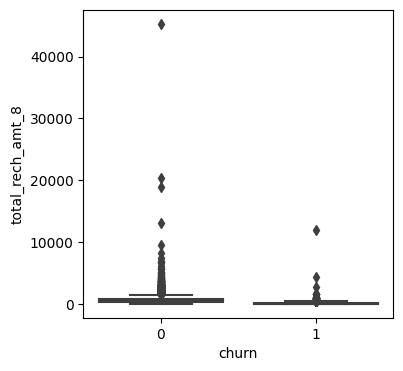

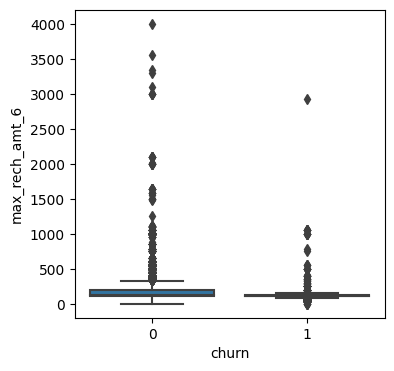

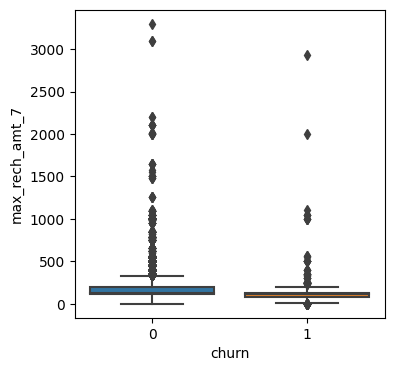

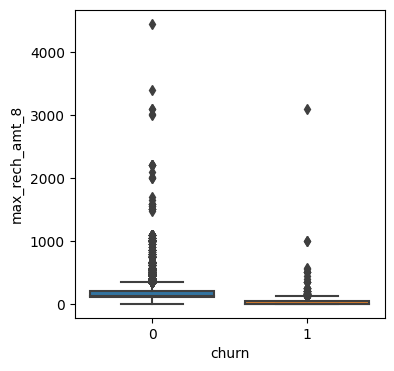

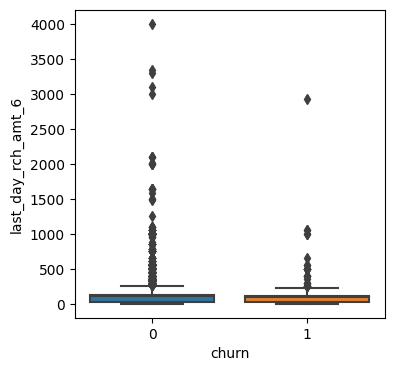

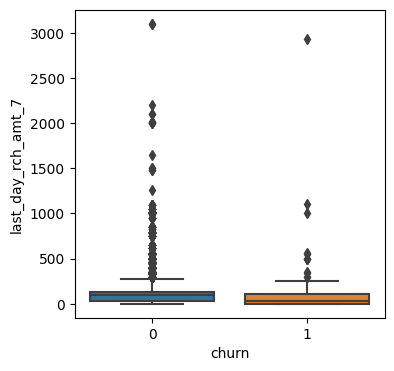

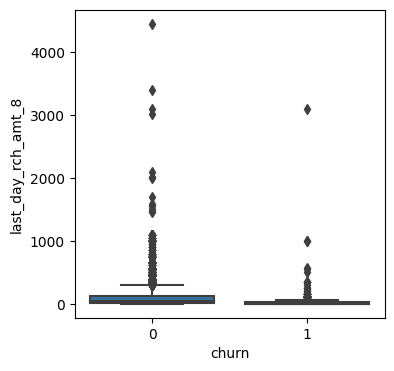

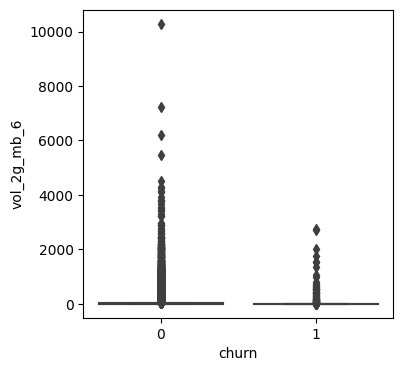

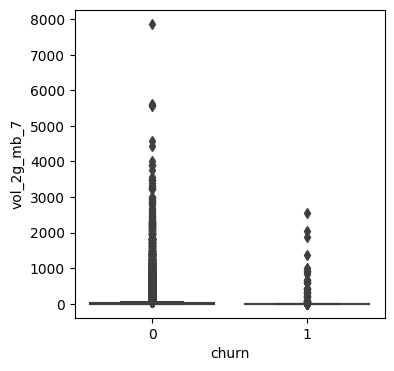

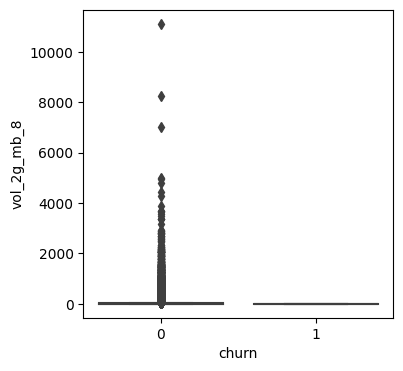

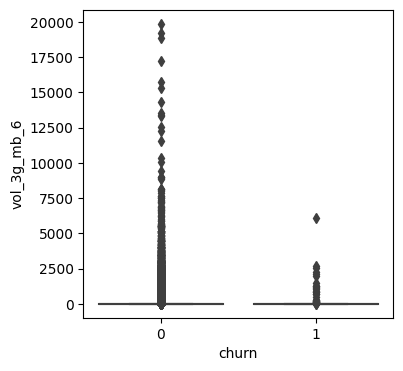

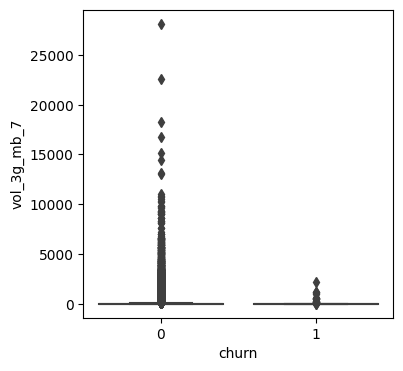

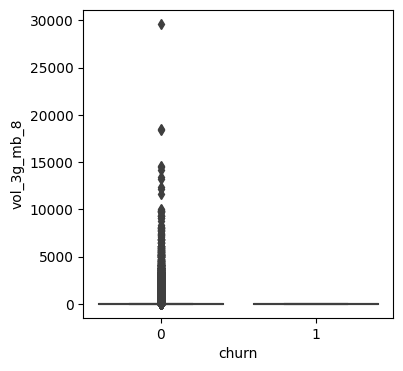

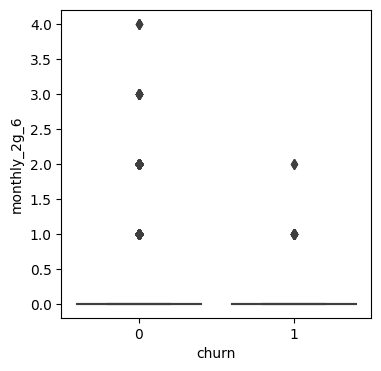

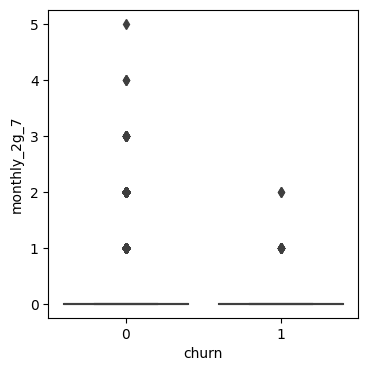

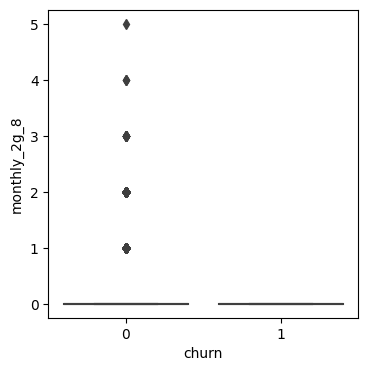

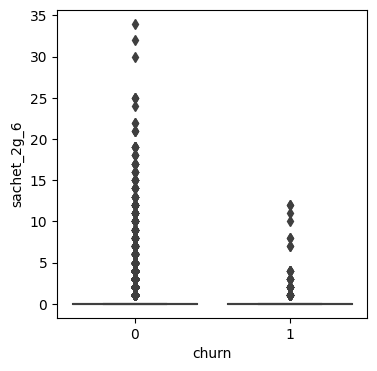

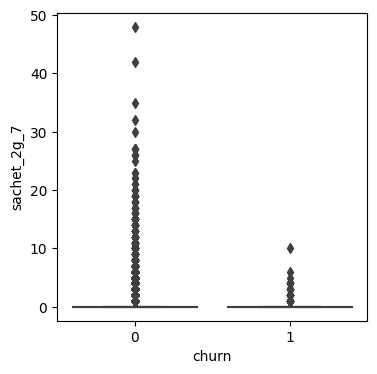

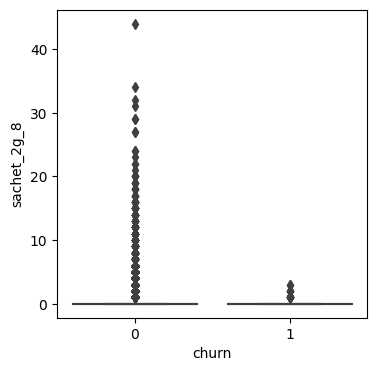

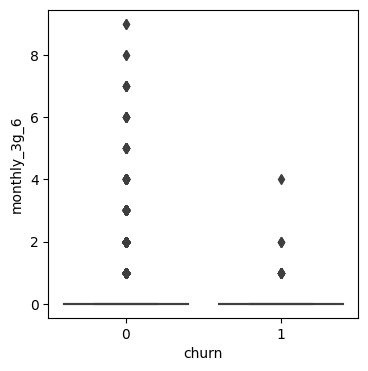

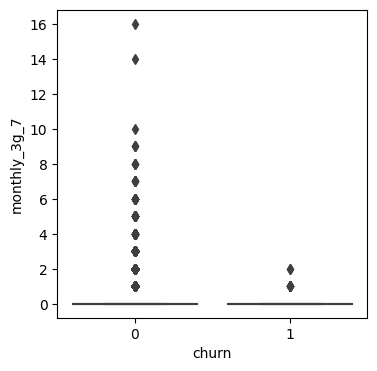

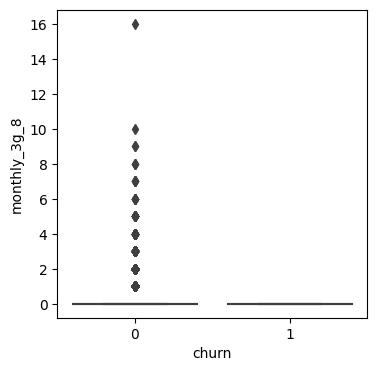

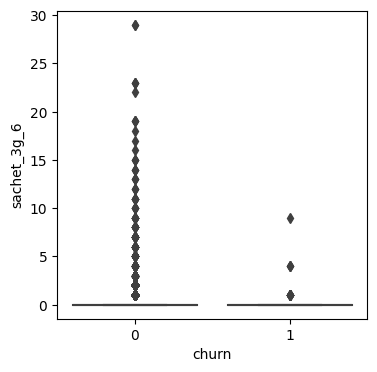

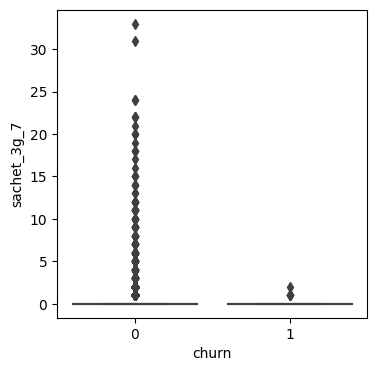

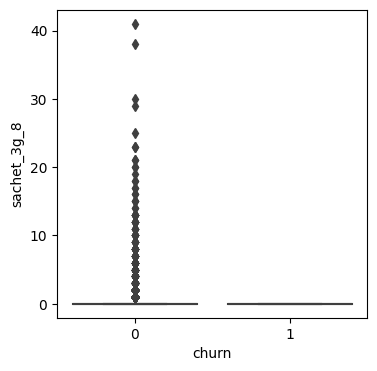

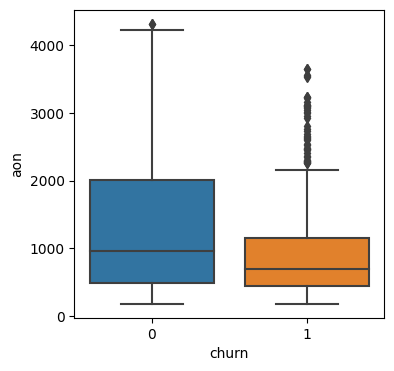

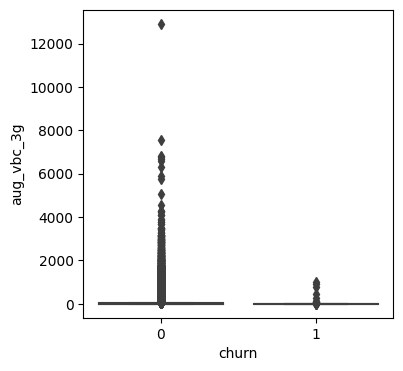

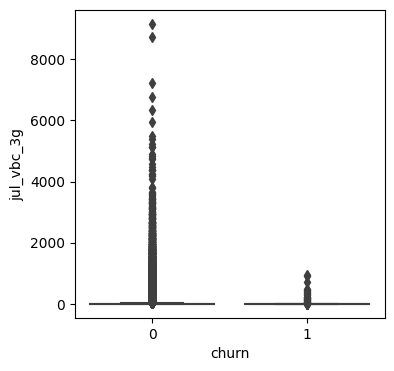

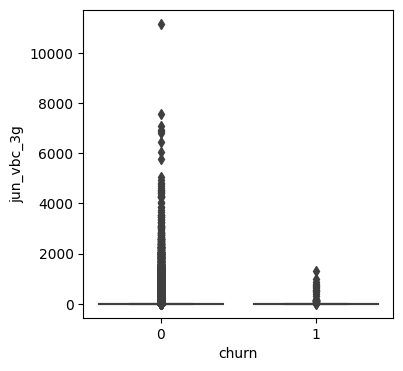

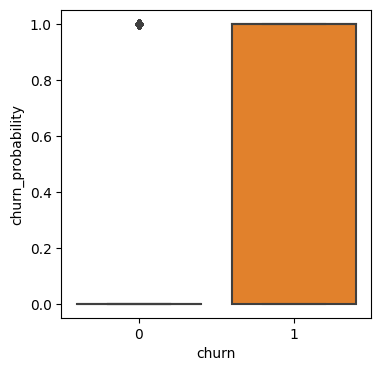

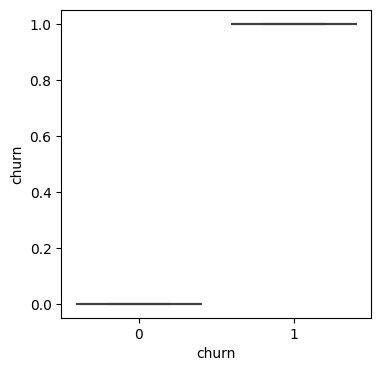

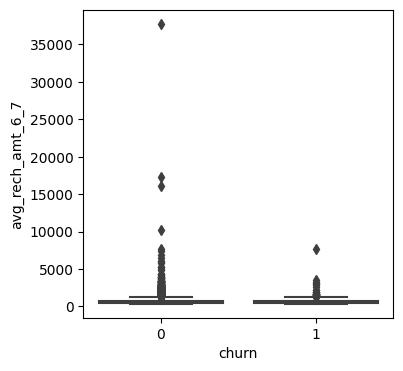

In [149]:
# Bivariate Analysis of Numerical Columns
for c in df_data.columns:
    num_col_bivariate_analysis('churn',c)

<Axes: >

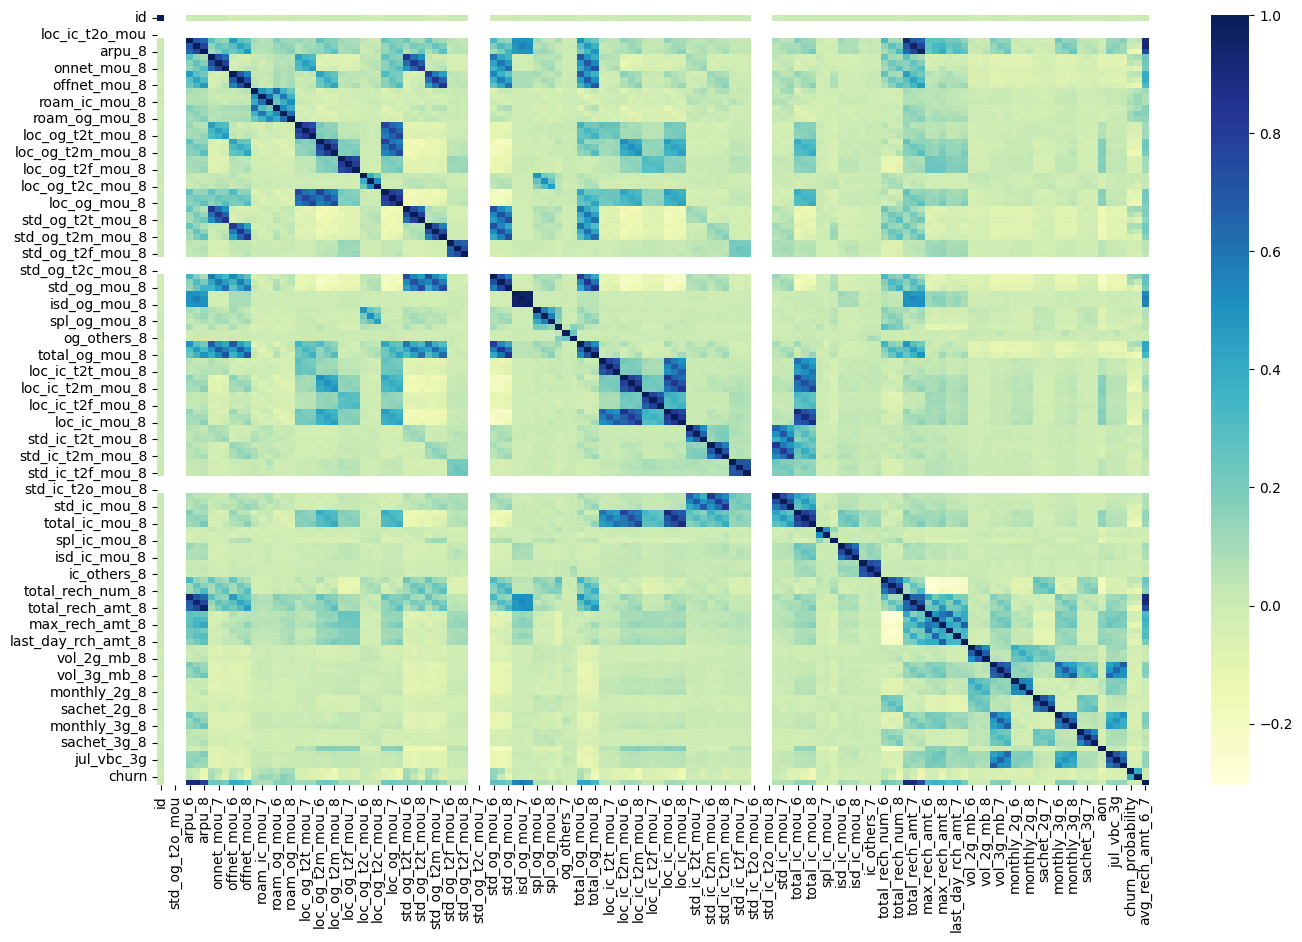

In [150]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(16, 10))
sns.heatmap(df_data.corr(), cmap="YlGnBu",annot=False)

<Axes: >

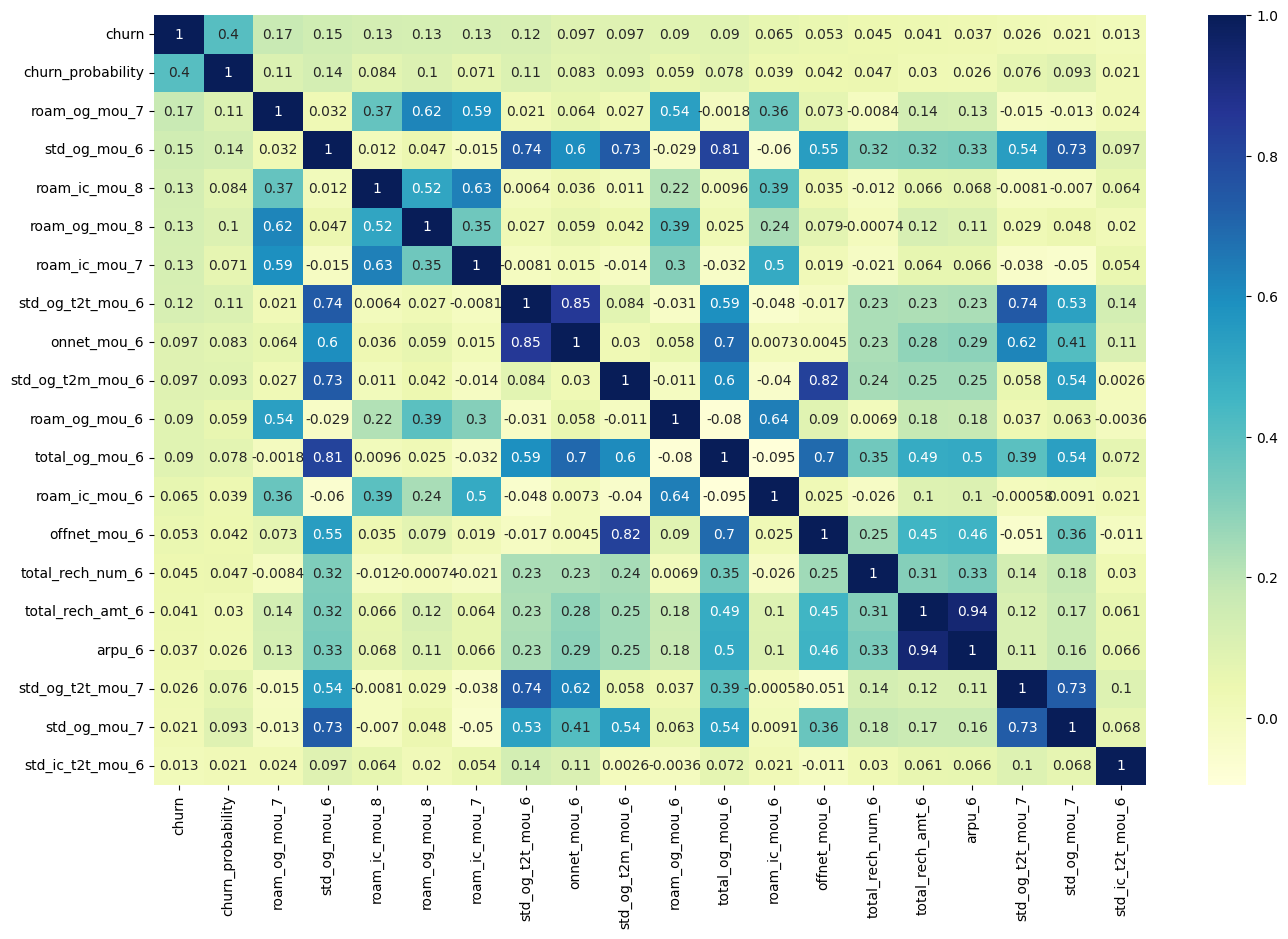

In [151]:
# Visualizing the correlation between major columns
k = 20 #number of variables for heatmap
corrmat = df_data.corr()
cols = corrmat.nlargest(k, 'churn')['churn'].index
plt.figure(figsize=(16, 10))
sns.heatmap(df_data[cols].corr(), cmap="YlGnBu",annot=True)

Finding
The same behaviour is evident here as well. Customers who recharge less frequently during the action phase than during the good phase have higher churn rates.

Churn rate based on whether the client reduced their volume-based cost in action month

Univariate Analysis conveys that there are a lot of attributes which have very less variation


Bivariate Analysis clearly reveals that
1.   max_rech_data is related to churn
2.   av_rech_amount is related to churn
3.   aon is related to churn
4.   total_usage_voice is related to churn
5.   total_usage_data is realted to churn







Heatmaps clearly reveals that
A lot of columns are related (and we can see patterns in heatmap), hence multicollinearity exist
None of the column have significant relation with the churn

Training the model

In [169]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_date(df):
    Y = df["churn"]
    X = df.drop(["churn"],axis=1)
    return X,Y

def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    print("Scaling the data ....")
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

In [170]:
df_data_pca = df_data.copy()
df_data_pca.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
12  12             0.0             0.0             0.0   439.919  397.946   
15  15             0.0             0.0             0.0   580.549  377.294   
23  23             0.0             0.0             0.0  1130.948  905.506   
24  24             0.0             0.0             0.0   371.974  352.069   
25  25             0.0             0.0             0.0   362.951  321.763   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
12  392.024       244.46       108.31        42.98        571.98   
15  338.286        10.43        24.99       194.43        317.11   
23  479.762       859.53       372.71         0.89        293.46   
24  240.449        93.18        38.29        29.86        531.19   
25  689.603       193.71       124.53       197.54        423.21   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
12        727.91        644.43            0.0            0.0            0.0   
15        341.79        197.09            0.0            0.0            0.0   
23        450.11        386.91            0.0            0.0            0.0   
24        507.76        222.03            0.0            0.0            0.0   
25        184.88        556.61            0.0            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
12            0.0            0.0            0.0              0.00   
15            0.0            0.0            0.0             10.43   
23            0.0            0.0            0.0            859.53   
24            0.0            0.0            0.0             93.18   
25            0.0            0.0            0.0             49.81   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
12              7.86              3.98             44.01             13.93   
15             24.99            194.43            313.76            330.88   
23            372.71              0.89             79.79            424.63   
24             38.29             29.86            159.29            219.44   
25             75.01             81.86            164.39            115.48   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
12             51.24              0.00              0.00              0.00   
15            185.88              3.26             10.91              4.94   
23            378.01             11.58             25.43              8.88   
24             99.86              0.00              0.00              0.00   
25            229.68              3.31              0.00              0.36   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
12               0.0               0.0              0.00         44.01   
15               0.0               0.0              0.00        327.46   
23               0.0               0.0              0.00        950.91   
24               0.0               0.0              0.36        252.48   
25               0.0               0.0              7.01        217.53   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
12         21.79         55.23            244.46            100.44   
15        366.79        385.26              0.00              0.00   
23        822.78        387.79              0.00              0.00   
24        257.74        129.73              0.00              0.00   
25        190.49        311.91            143.89             49.51   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
12             38.99            527.96            713.98            593.18   
15              0.00              0.00              0.00              0.00   
23              0.00            202.08              0.00              0.00   
24              0.00            371.89            288.31            121.79   
25            115.68            255.49          

In [171]:
#Splitting in x and y
X,Y=split_date(df_data_pca)

In [172]:
X.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
12  12             0.0             0.0             0.0   439.919  397.946   
15  15             0.0             0.0             0.0   580.549  377.294   
23  23             0.0             0.0             0.0  1130.948  905.506   
24  24             0.0             0.0             0.0   371.974  352.069   
25  25             0.0             0.0             0.0   362.951  321.763   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
12  392.024       244.46       108.31        42.98        571.98   
15  338.286        10.43        24.99       194.43        317.11   
23  479.762       859.53       372.71         0.89        293.46   
24  240.449        93.18        38.29        29.86        531.19   
25  689.603       193.71       124.53       197.54        423.21   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
12        727.91        644.43            0.0            0.0            0.0   
15        341.79        197.09            0.0            0.0            0.0   
23        450.11        386.91            0.0            0.0            0.0   
24        507.76        222.03            0.0            0.0            0.0   
25        184.88        556.61            0.0            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
12            0.0            0.0            0.0              0.00   
15            0.0            0.0            0.0             10.43   
23            0.0            0.0            0.0            859.53   
24            0.0            0.0            0.0             93.18   
25            0.0            0.0            0.0             49.81   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
12              7.86              3.98             44.01             13.93   
15             24.99            194.43            313.76            330.88   
23            372.71              0.89             79.79            424.63   
24             38.29             29.86            159.29            219.44   
25             75.01             81.86            164.39            115.48   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
12             51.24              0.00              0.00              0.00   
15            185.88              3.26             10.91              4.94   
23            378.01             11.58             25.43              8.88   
24             99.86              0.00              0.00              0.00   
25            229.68              3.31              0.00              0.36   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
12               0.0               0.0              0.00         44.01   
15               0.0               0.0              0.00        327.46   
23               0.0               0.0              0.00        950.91   
24               0.0               0.0              0.36        252.48   
25               0.0               0.0              7.01        217.53   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
12         21.79         55.23            244.46            100.44   
15        366.79        385.26              0.00              0.00   
23        822.78        387.79              0.00              0.00   
24        257.74        129.73              0.00              0.00   
25        190.49        311.91            143.89             49.51   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
12             38.99            527.96            713.98            593.18   
15              0.00              0.00              0.00              0.00   
23              0.00            202.08              0.00              0.00   
24              0.00            371.89            288.31            121.79   
25            115.68            255.49          

In [173]:
Y.head(10)

12    0
15    0
23    0
24    0
25    0
27    0
39    0
45    0
49    0
51    0
Name: churn, dtype: int64

Percentage distribution of churn/non-churn cutomer data

In [174]:
print("Percenatge of Churned Customer data : "+str(round(100*Y.sum()/len(Y),2)))

Percenatge of Churned Customer data : 3.07


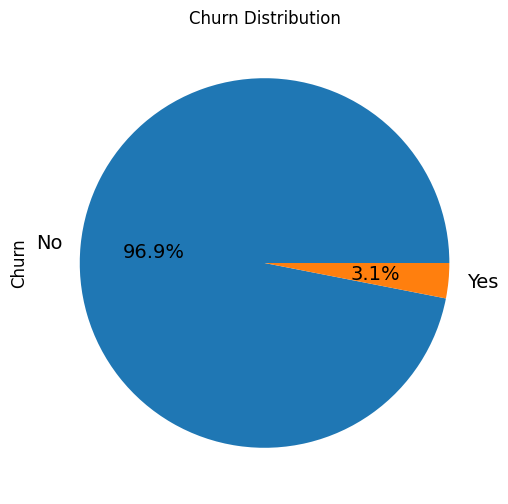

In [175]:
#Churn Distribution
pie_chart = df_data_pca['churn'].value_counts()*100.0 /len(df_data_pca)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

Scaling the data so as to normalize all the fields

In [176]:
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

Scaling the data ....
(20206, 136)


id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
0 -1.738122             0.0             0.0             0.0 -0.324433   
1 -1.737973             0.0             0.0             0.0 -0.006326   
2 -1.737576             0.0             0.0             0.0  1.238682   
3 -1.737527             0.0             0.0             0.0 -0.478125   
4 -1.737477             0.0             0.0             0.0 -0.498535   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0 -0.408832 -0.303643    -0.116179    -0.413889    -0.490740      0.323229   
1 -0.452120 -0.409451    -0.623259    -0.584575    -0.172286     -0.226513   
2  0.655039 -0.130890     1.216513     0.127751    -0.579242     -0.277525   
3 -0.504992 -0.602088    -0.443962    -0.557329    -0.518327      0.235247   
4 -0.568515  0.282279    -0.226140    -0.380661    -0.165747      0.002339   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.615661      0.544187      -0.225344      -0.174508      -0.174937   
1     -0.188525     -0.402571      -0.225344      -0.174508      -0.174937   
2      0.037077     -0.000833      -0.225344      -0.174508      -0.174937   
3      0.157147     -0.349788      -0.225344      -0.174508      -0.174937   
4     -0.515327      0.358323      -0.225344      -0.174508      -0.174937   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0      -0.246499      -0.224461      -0.199663         -0.398860   
1      -0.246499      -0.224461      -0.199663         -0.355445   
2      -0.246499      -0.224461      -0.199663          3.178982   
3      -0.246499      -0.224461      -0.199663         -0.010993   
4      -0.246499      -0.224461      -0.199663         -0.191524   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.355349         -0.352771         -0.560055         -0.723356   
1         -0.287911          0.426441          0.521096          0.622672   
2          1.081006         -0.365414         -0.416650          1.020811   
3         -0.235551         -0.246885         -0.098016          0.149407   
4         -0.090990         -0.034131         -0.077575         -0.292092   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.522194         -0.333656         -0.334880         -0.331389   
1          0.060114         -0.179243          0.172519         -0.086109   
2          0.891062          0.214842          0.847810          0.109520   
3         -0.311916         -0.333656         -0.334880         -0.331389   
4          0.249546         -0.176875         -0.334880         -0.313514   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.215512         -0.195729         -0.234214     -0.632530   
1         -0.215512         -0.195729         -0.234214      0.106479   
2         -0.215512         -0.195729         -0.234214      1.731935   
3         -0.215512         -0.195729         -0.185571     -0.089008   
4         -0.215512         -0.195729          0.712973     -0.180130   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.710296     -0.576152          0.132171         -0.237465   
1      0.204756      0.313903         -0.465429         -0.469387   
2      1.414189      0.320726         -0.465429         -0.469387   
3     -0.084480     -0.375234         -0.465429         -0.469387   
4     -0.262849      0.116086         -0.113680         -0.355065   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0         -0.333975          0.794472          1.135337          0.975580   
1         -0.427859         -0.501963         -0.500786         -0.449271   
2         -0.427859         -0.005745         -0.500786         -0.449271   
3         -0.427859          0.411233          0.159892         -0.156725   
4         -0.149313          0.125407         -0.351858   

In [177]:
#replacing nan with 0
X_scaled=X_scaled.replace(np.nan,0)

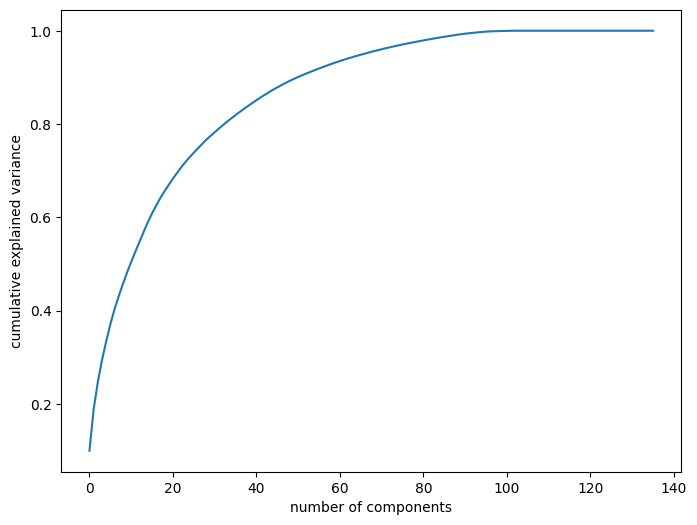

PC1           PC2           PC3         Feature
0  3.205685e-03 -2.397358e-03  6.785659e-04              id
1 -1.665335e-16  2.220446e-16  9.714451e-17  loc_og_t2o_mou
2 -1.110223e-16  0.000000e+00  1.630640e-16  std_og_t2o_mou
3 -5.551115e-17  0.000000e+00 -1.249001e-16  loc_ic_t2o_mou
4  1.603390e-01  1.173330e-01  1.435169e-01          arpu_6

In [178]:
pca = get_scree_plot(X_scaled) # scree plot

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head()

In [179]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 9.99, 18.84, 24.69, 29.42, 33.38, 37.07, 40.3 , 43.07, 45.69,
       48.15, 50.47, 52.65, 54.8 , 56.92, 58.97, 60.87, 62.54, 64.18,
       65.61, 66.96, 68.31, 69.55, 70.76, 71.85, 72.88, 73.86, 74.81,
       75.74, 76.64, 77.43, 78.22, 79.01, 79.77, 80.52, 81.22, 81.9 ,
       82.58, 83.23, 83.86, 84.48, 85.08, 85.68, 86.24, 86.79, 87.33,
       87.83, 88.31, 88.78, 89.23, 89.65, 90.05, 90.43, 90.8 , 91.16,
       91.52, 91.86, 92.2 , 92.53, 92.85, 93.16, 93.46, 93.75, 94.03,
       94.29, 94.55, 94.81, 95.06, 95.3 , 95.54, 95.77, 95.99, 96.2 ,
       96.41, 96.62, 96.81, 97.  , 97.19, 97.37, 97.54, 97.71, 97.88,
       98.04, 98.2 , 98.35, 98.5 , 98.65, 98.79, 98.93, 99.06, 99.19,
       99.3 , 99.4 , 99.49, 99.58, 99.66, 99.73, 99.79, 99.82, 99.85,
       99.87, 99.89, 99.91, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92,
       99.92, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92,
       99.92, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92, 99.92,
       99.92, 99.92,

Observation : Looks like 60 components are enough to describe 95% of the variance in the dataset.We'll choose 60 components for our modeling

Model Prediction and Evaluation

In [219]:
x_train=X
y_train=Y

In [220]:
print(x_train.shape)
print(y_train.shape)

(20206, 38)
(20206,)


In [182]:
X_train=x_train.drop(['churn_probability'],axis=1)

In [183]:
test_data=pd.read_csv("/content/test.csv")

In [192]:
test_data_high_val_cust = test_data
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                          'last_date_of_month_6', 'last_date_of_month_7',
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_ic_t2o_mou_6',
                          'std_ic_t2o_mou_7']

print("Features before dropping unique values : "+ str(test_data_high_val_cust.shape[1]))
test_data_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)
print("Features after dropping unique values : "+ str(test_data_high_val_cust.shape[1]))

Features before dropping unique values : 171
Features after dropping unique values : 161


In [193]:
list_total_og_cols = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
test_data_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)
#log("Columns dropped - ")
list_total_og_cols.tolist()
mou_ic_cols6 = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
test_data_high_val_cust.loc[:,mou_ic_cols6].describe()
list_total_ic_cols = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
test_data_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
#log("Columns dropped - ")
list_total_ic_cols.tolist()
offnet_usage_service_col = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]
#minutes of usage related columns
onnet_usage_service =test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

In [99]:
test_data.shape

(30000, 171)

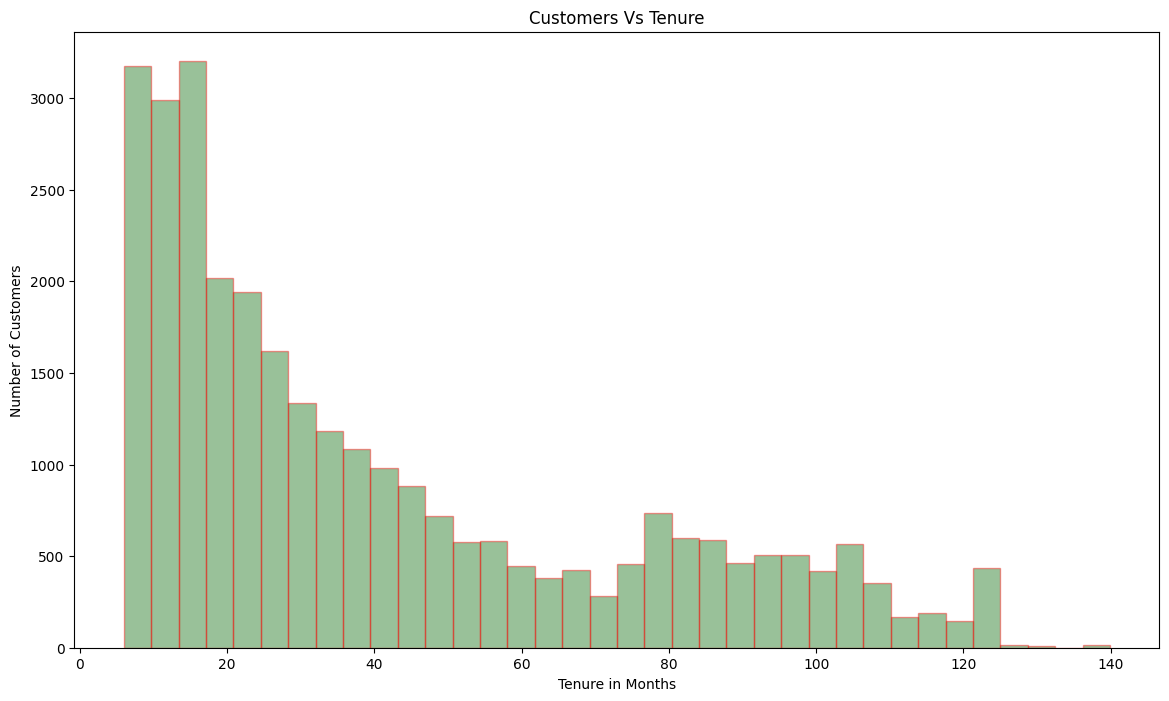

(30000, 143)
(30000, 136)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user


In [195]:
tenure_data = test_data_high_val_cust.copy()
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkgreen',
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

numberic_col = [ 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

test_data_final = test_data_high_val_cust.copy()
print(test_data_final.shape)
test_data_final.head(3)
test_data_final.drop(test_data_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (test_data_final.shape)

col_list = test_data_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    test_data_final[avg_col_name] = (test_data_final[col_6]  + test_data_final[col_7])/ 2

In [203]:
print(x_train.columns.tolist())

['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8

In [200]:
test_x=test_x.replace(np.nan,0)

In [221]:
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(x_train,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                         1000.0, 10000.0],
                     cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                     n_jobs=-1, random_state=100, scoring='accuracy',
                     solver='saga')

In [222]:
# Evaluation on Test Dataset
predictions = searchCV.predict(test_x)

In [223]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):

    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)

    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

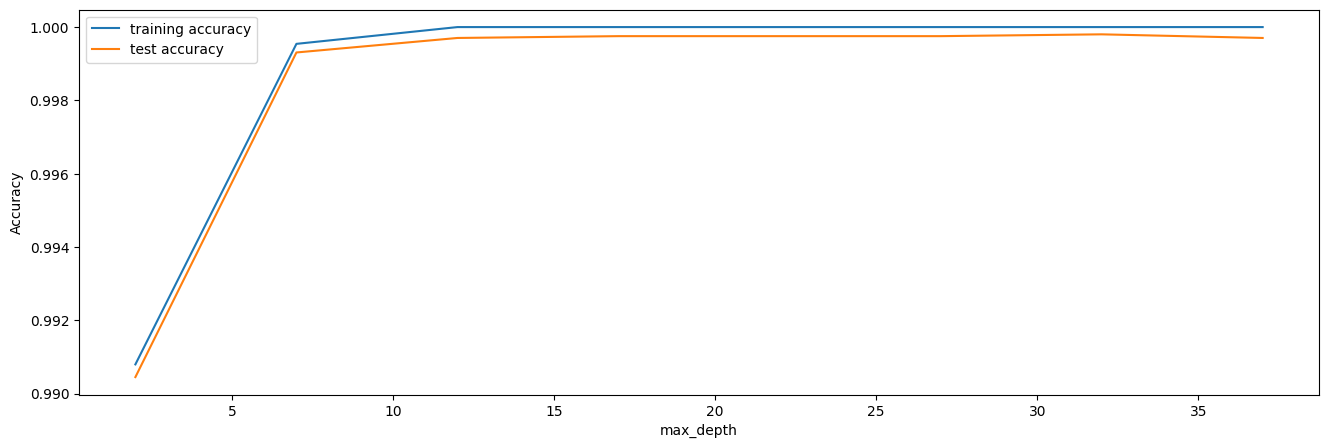

In [224]:
# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters,x_train,y_train)

optimal value: 7:12

In [235]:
rfc = RandomForestClassifier(max_depth=12,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=10,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_features=40, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1)

In [236]:
# Making predictions
predictions = rfc.predict(test_x)

In [237]:
solution_data=pd.DataFrame(predictions,index=test_data['id'],columns=['churn_probability'])

In [238]:
solution_data

churn_probability
id                      
69999                  0
70000                  0
70001                  1
70002                  0
70003                  0
...                  ...
99994                  0
99995                  0
99996                  0
99997                  0
99998                  0

[30000 rows x 1 columns]

In [239]:
solution_data.to_csv("Submission.csv")